In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
file_path = "C:/Users/gotlu/Downloads/archive (8)/day.csv"
df = pd.read_csv(file_path)
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [4]:
# Check 1st Five rows
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
# Check last 5 rows
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe(include = 'all')

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
df.drop(["dteday"],axis=1 ,inplace=True)

In [11]:
df.head()


instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1       1   0     1        0        6           0           2   
1        2       1   0     1        0        0           0           2   
2        3       1   0     1        0        1           1           1   
3        4       1   0     1        0        2           1           1   
4        5       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [12]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [13]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [14]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [15]:
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [16]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [17]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [18]:
numeric_features = df.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [19]:
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

[]

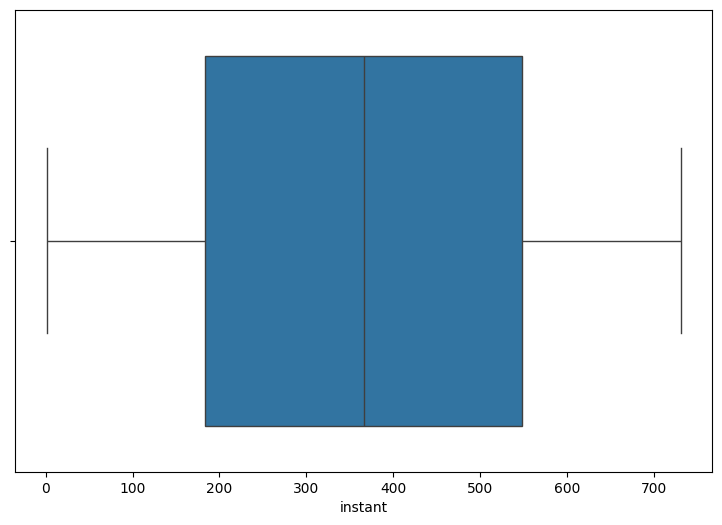

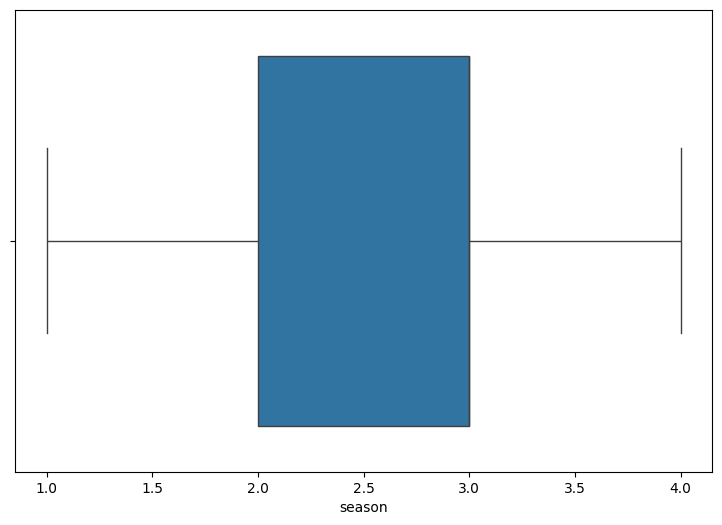

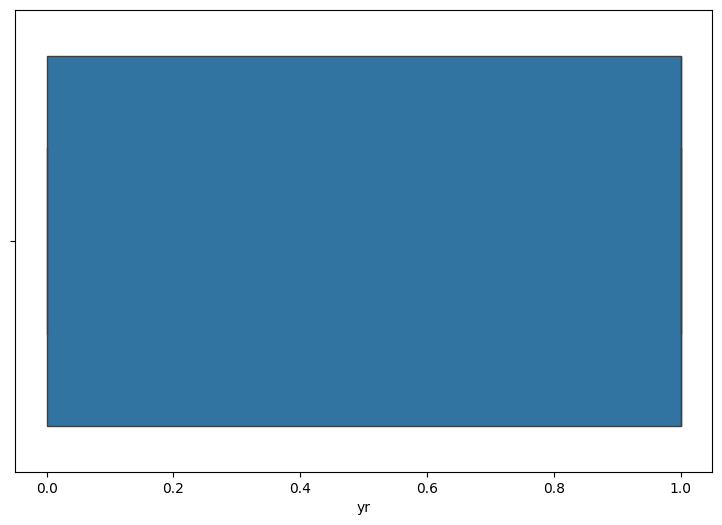

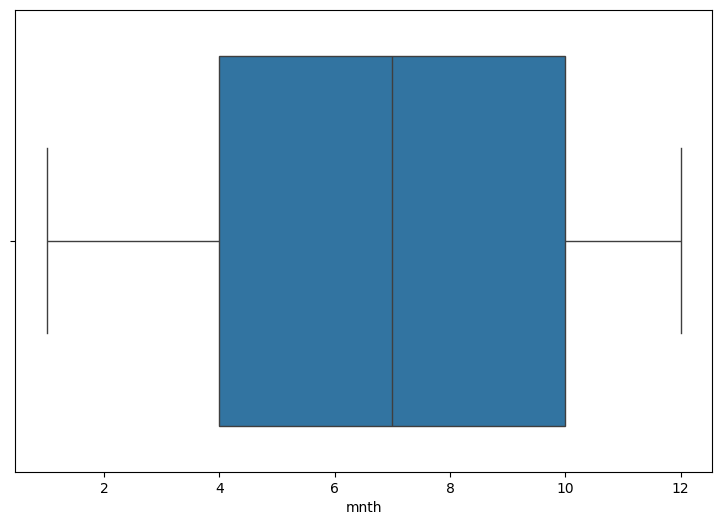

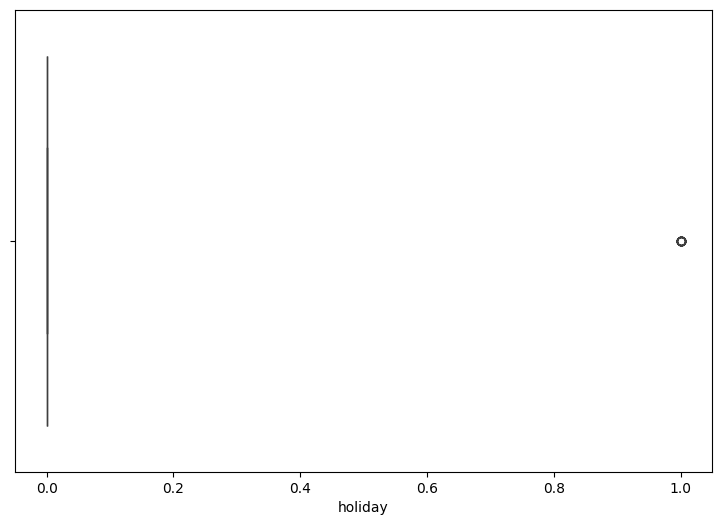

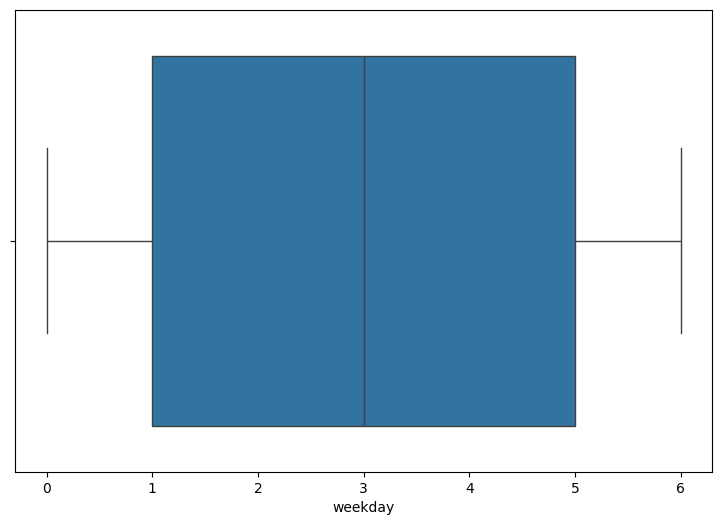

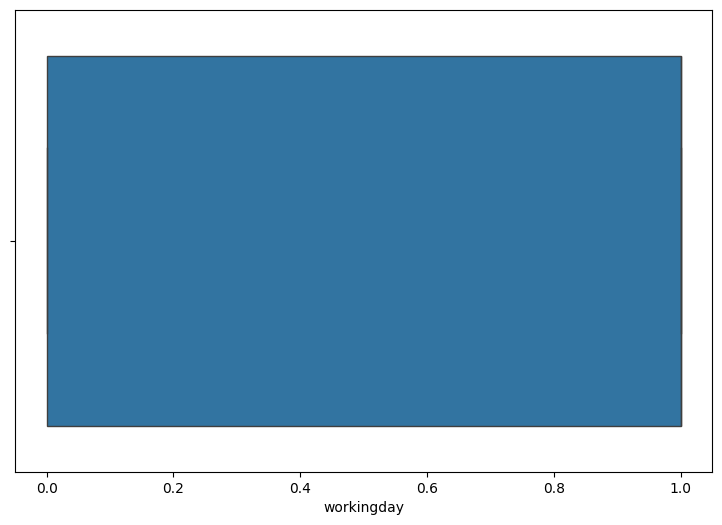

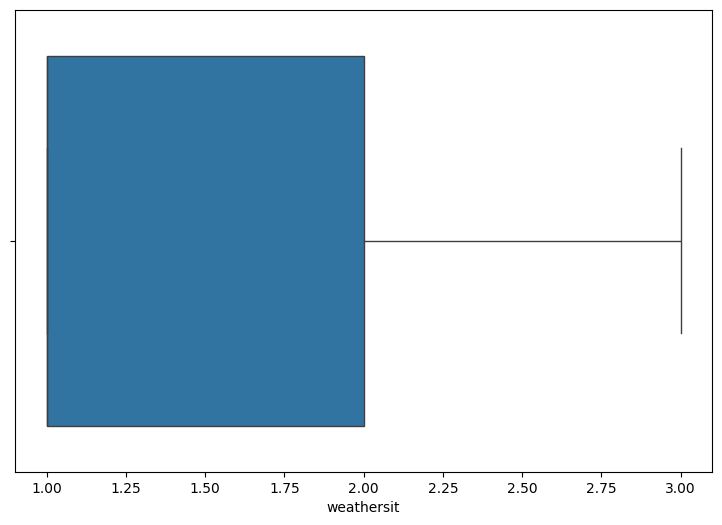

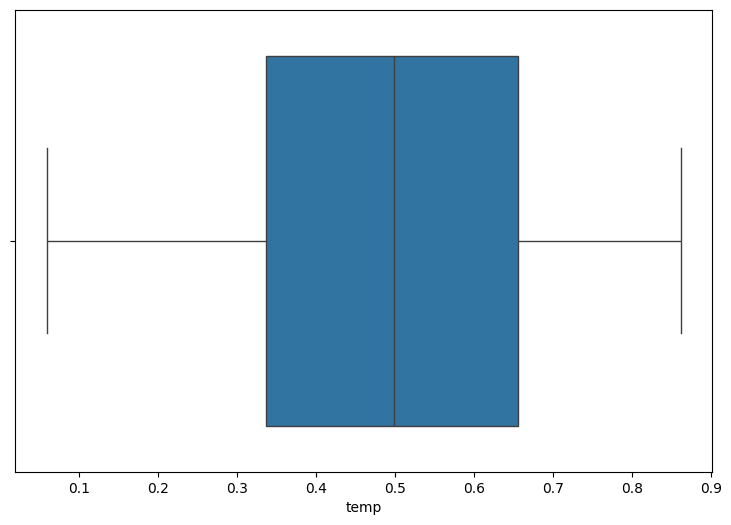

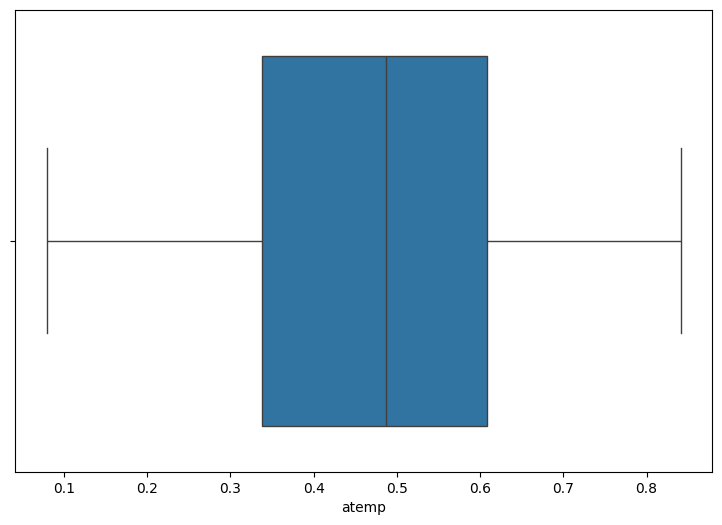

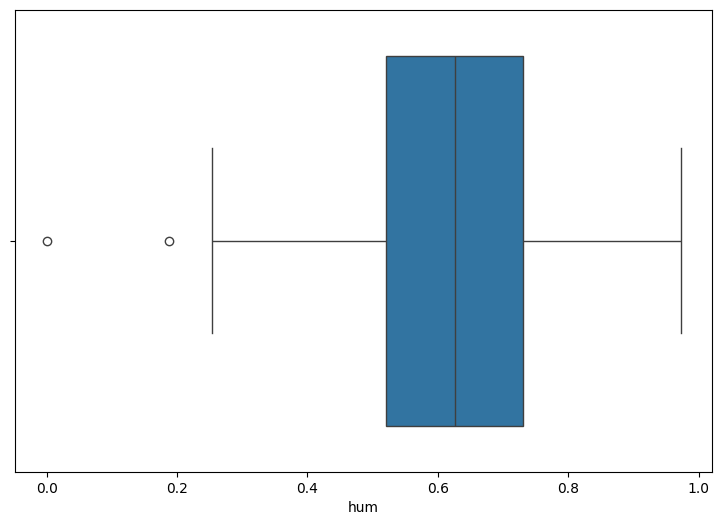

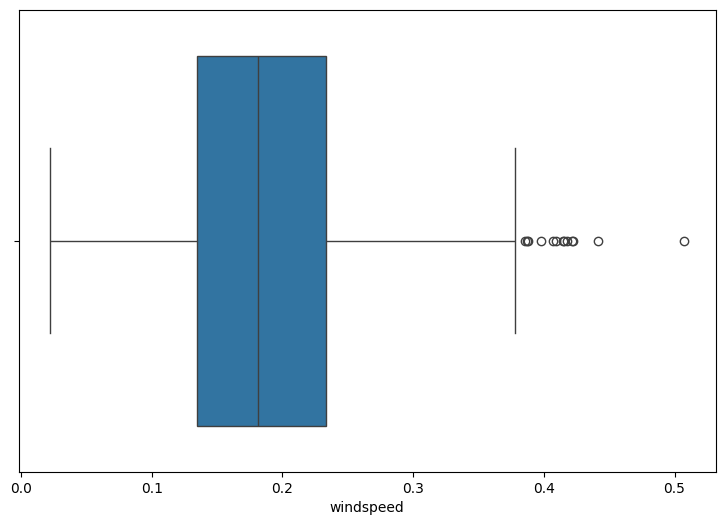

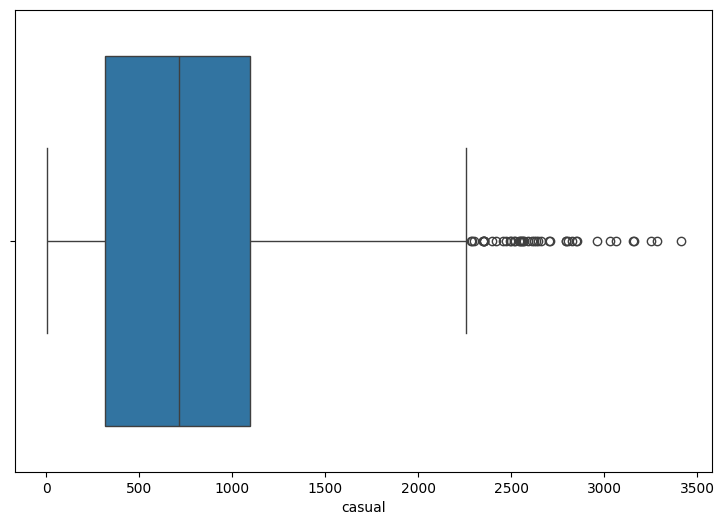

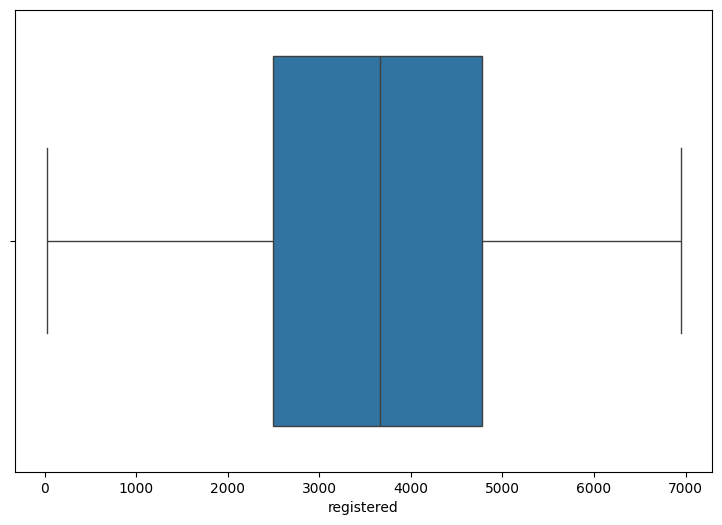

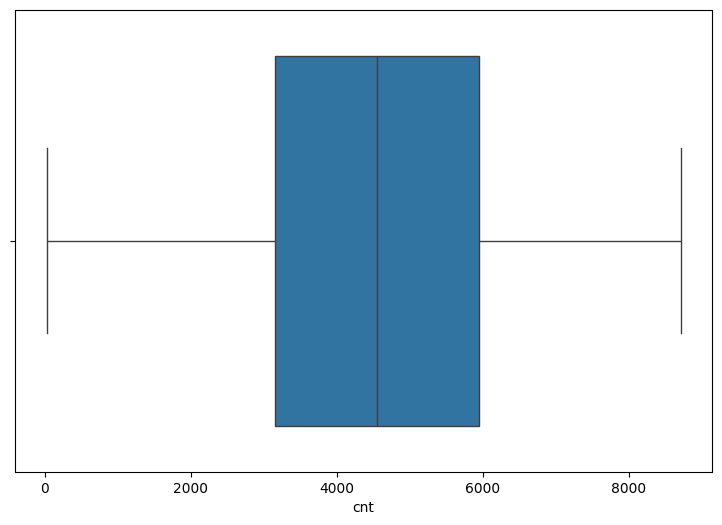

In [20]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

Text(0.5, 1.0, 'Bike Rentals by Weekday and Holiday')

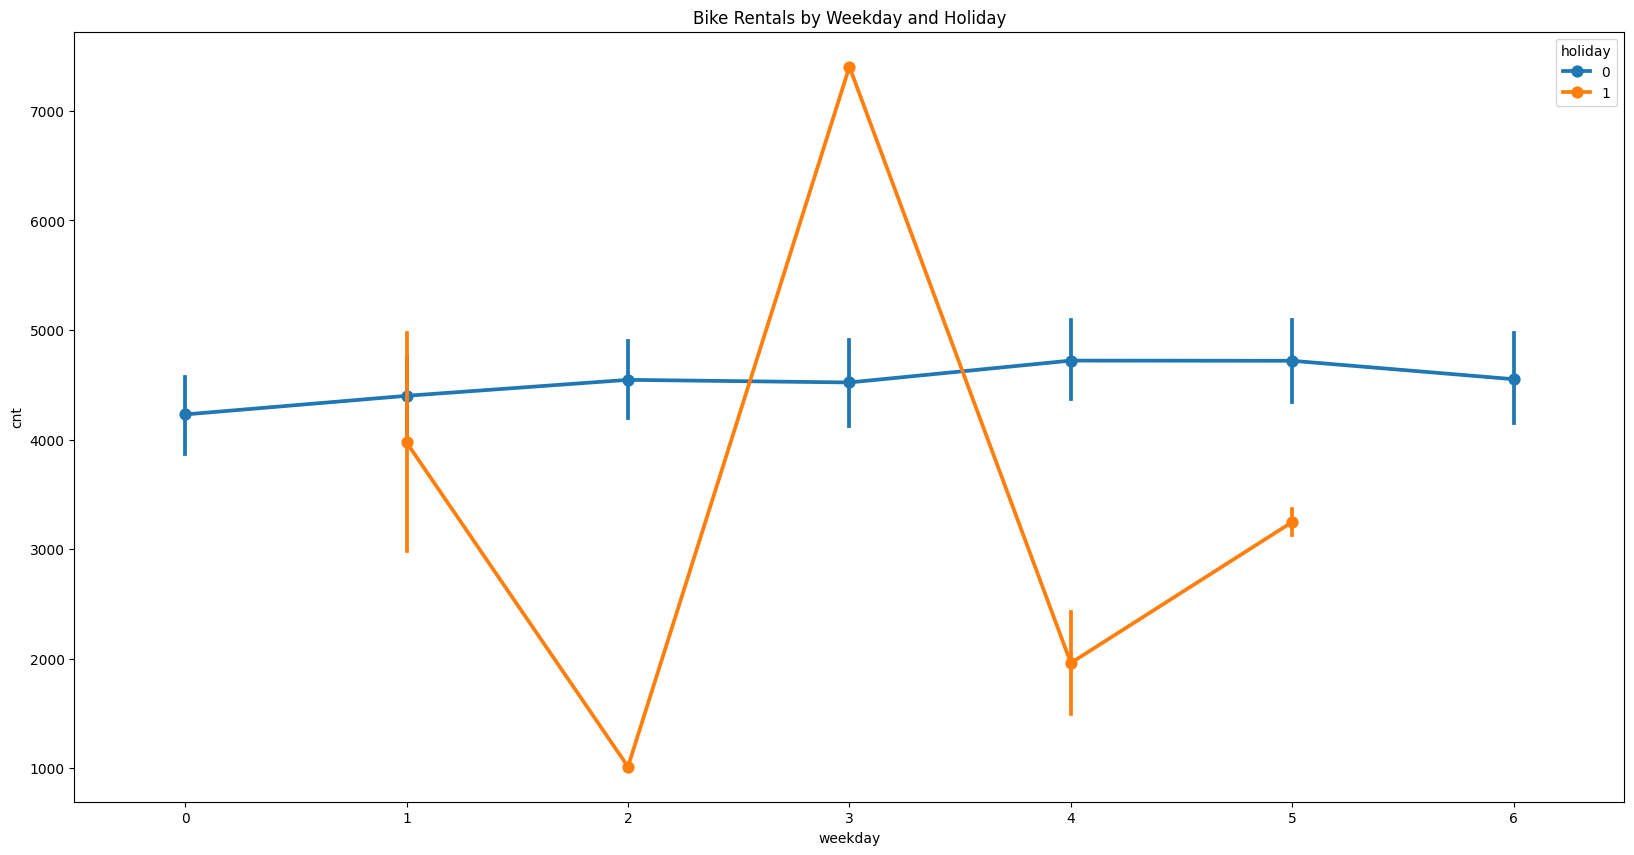

In [21]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['holiday'])
plt.title("Bike Rentals by Weekday and Holiday")

Text(0.5, 1.0, 'Impact of Seasonal Humidity on Bike Rental Counts')

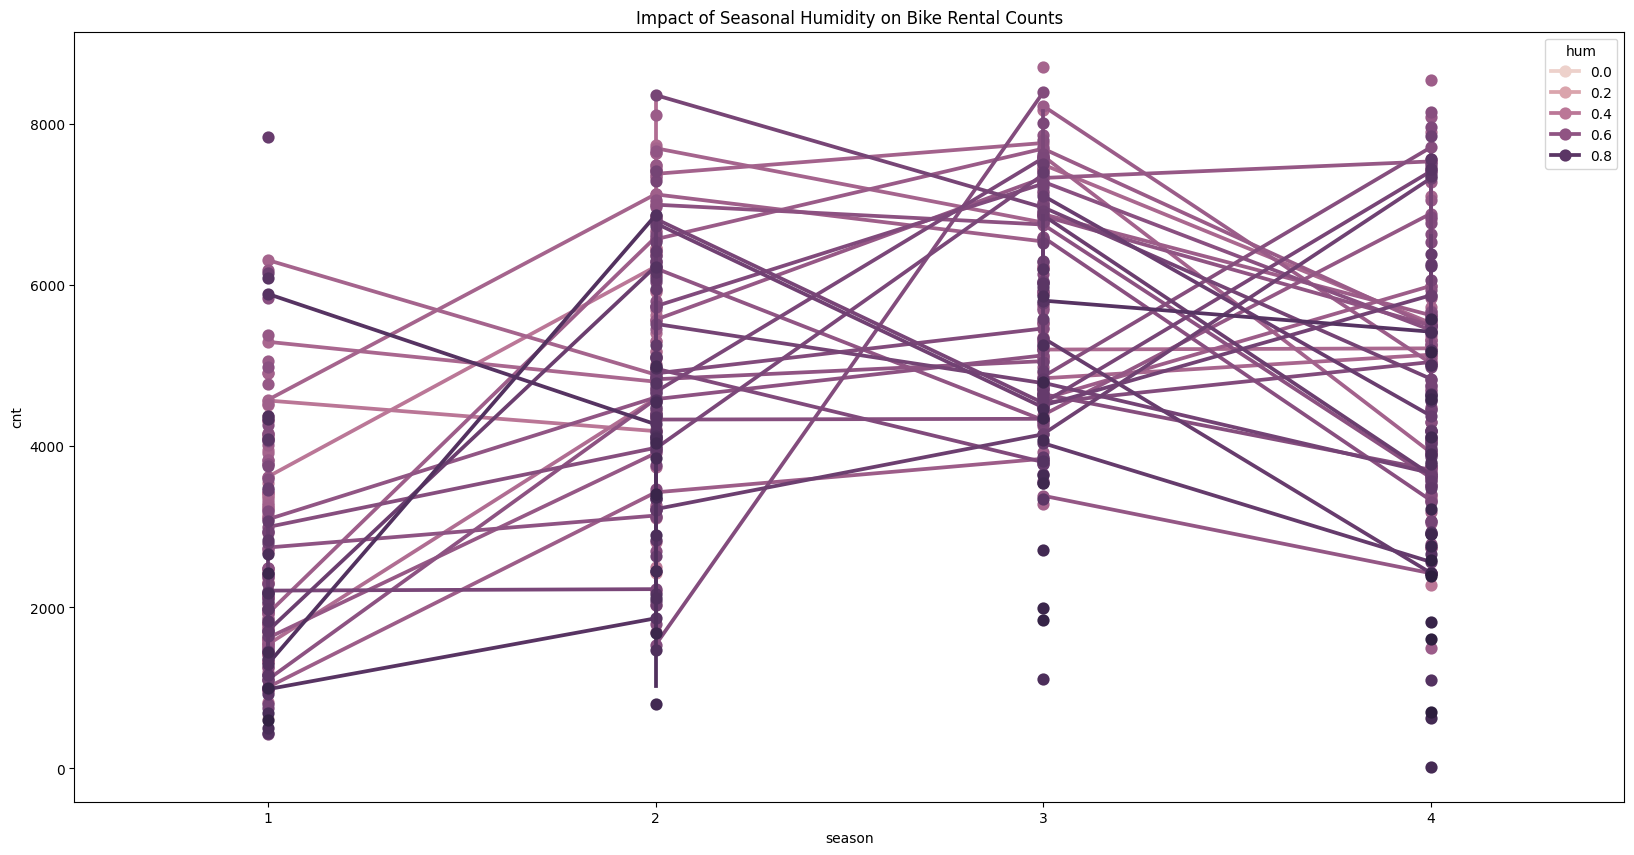

In [22]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['season'],y = df['cnt'],hue = df['hum'])
plt.title("Impact of Seasonal Humidity on Bike Rental Counts")

Text(0.5, 1.0, 'Impact of windspeed and temperature on Bike Rental Counts')

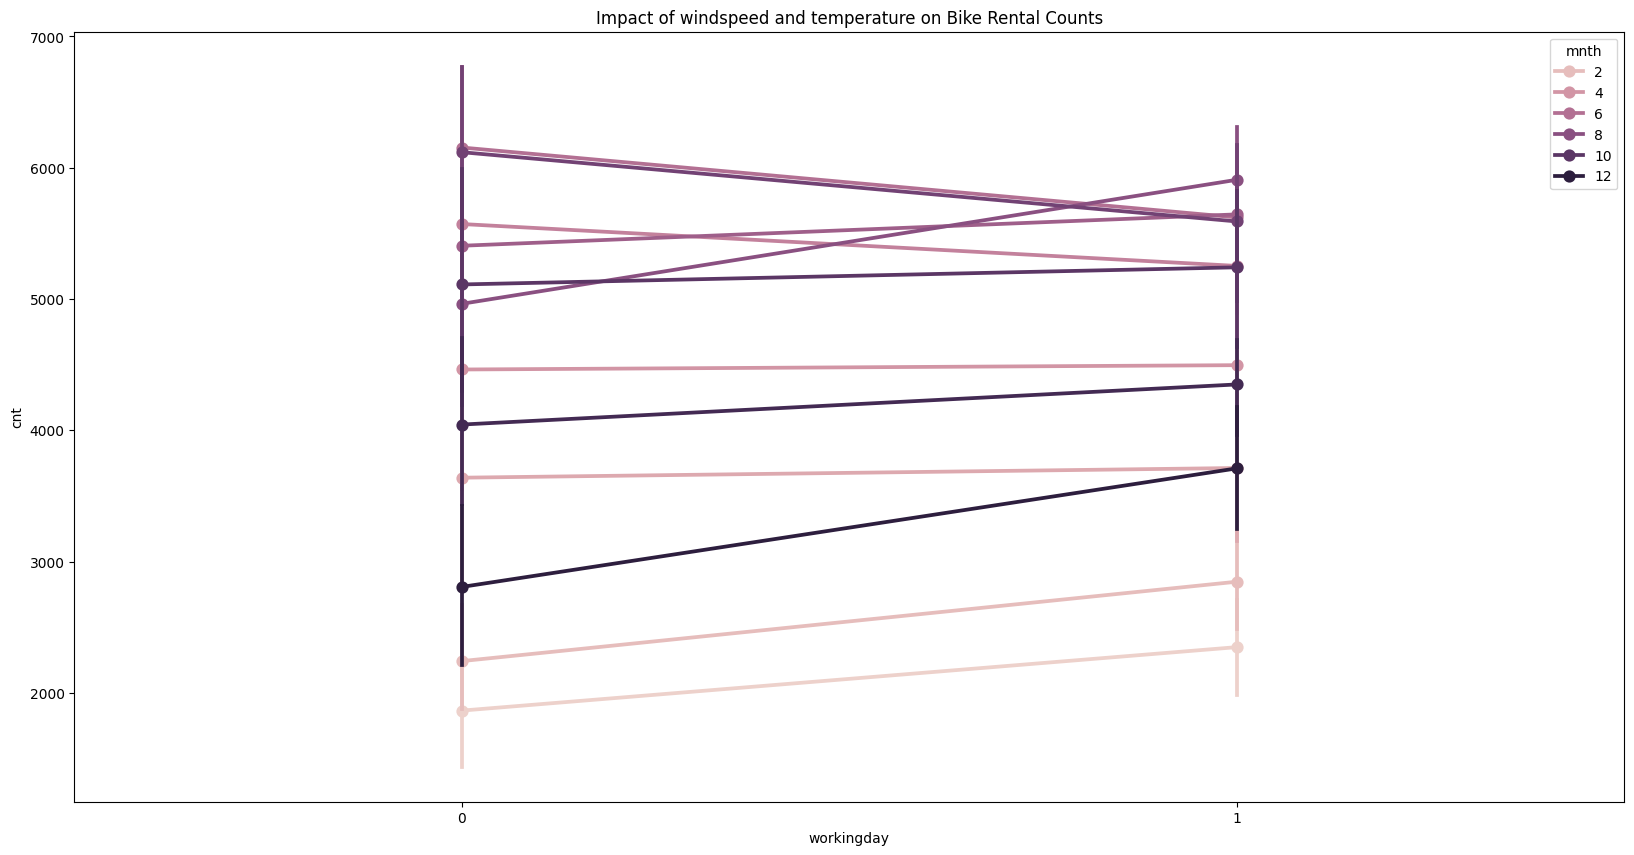

In [23]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['workingday'],y = df['cnt'],hue = df['mnth'])
plt.title("Impact of windspeed and temperature on Bike Rental Counts")

C:\Users\gotlu\AppData\Local\Temp\ipykernel_22756\3218089280.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['cnt'],color='g',ax=axes[0])


<Axes: xlabel='cnt'>

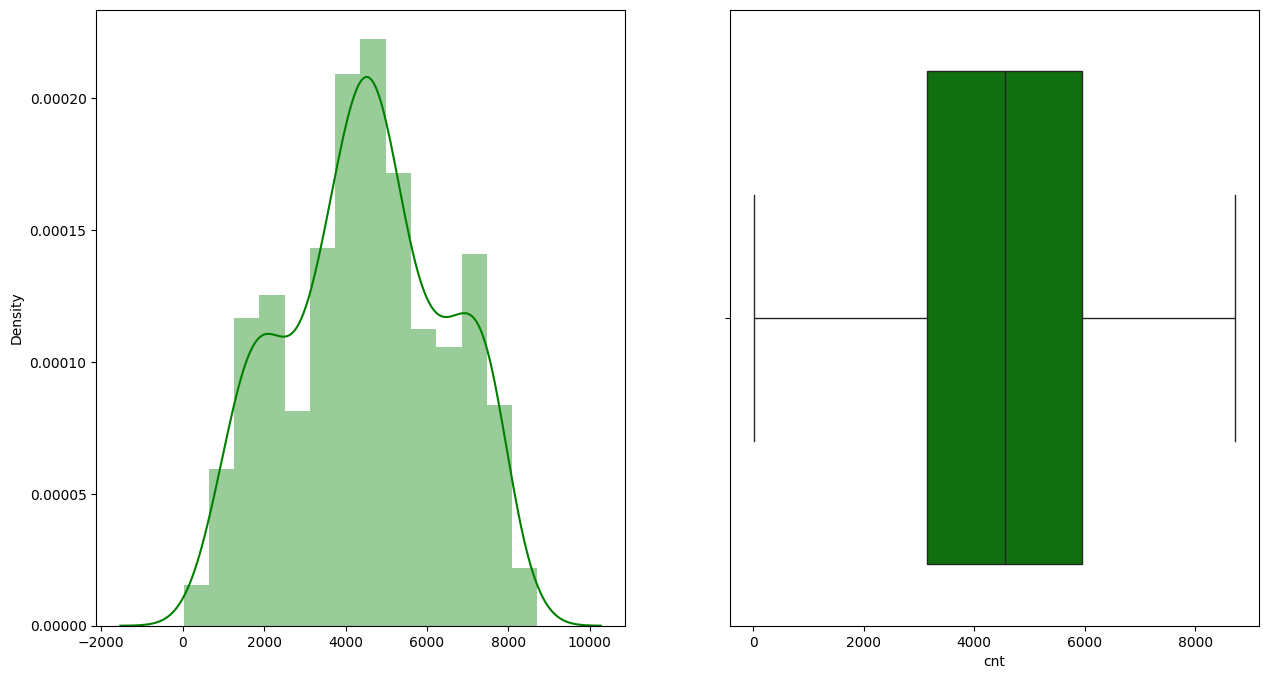

In [24]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])

C:\Users\gotlu\AppData\Local\Temp\ipykernel_22756\2042711442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= np.sqrt(df['cnt']),color='g',ax=axes[0])


<Axes: xlabel='cnt'>

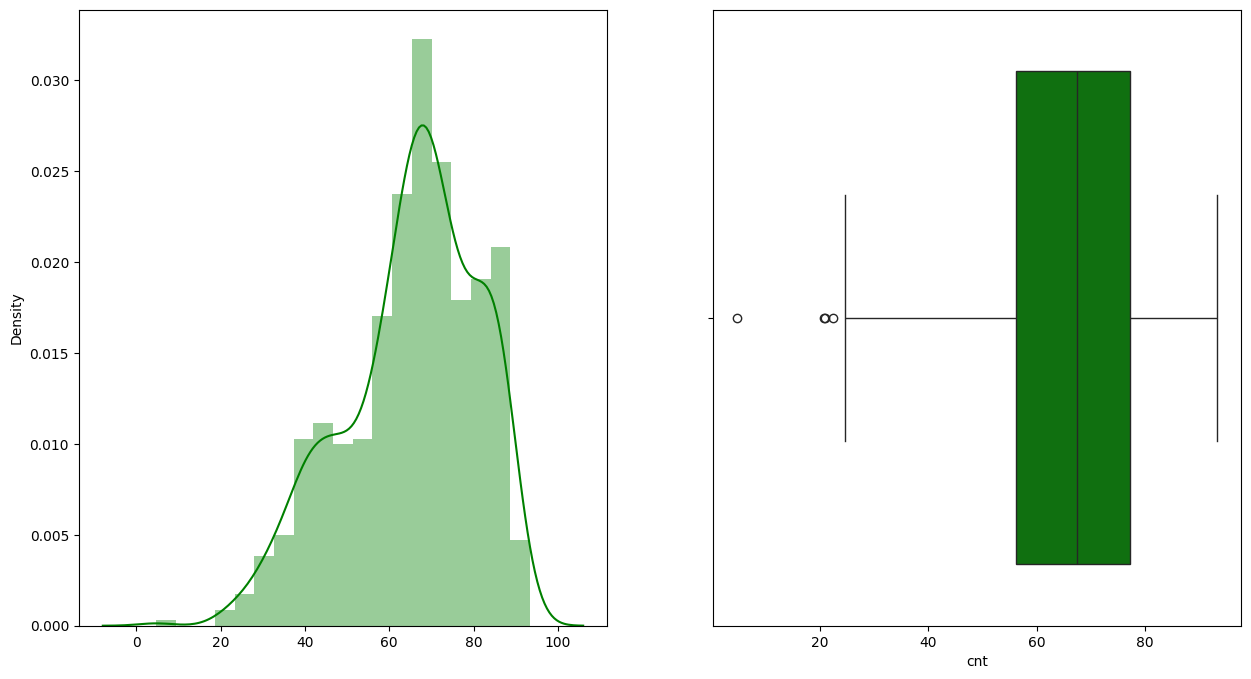

In [25]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(df['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(df['cnt']),color='g',ax=axes[1])

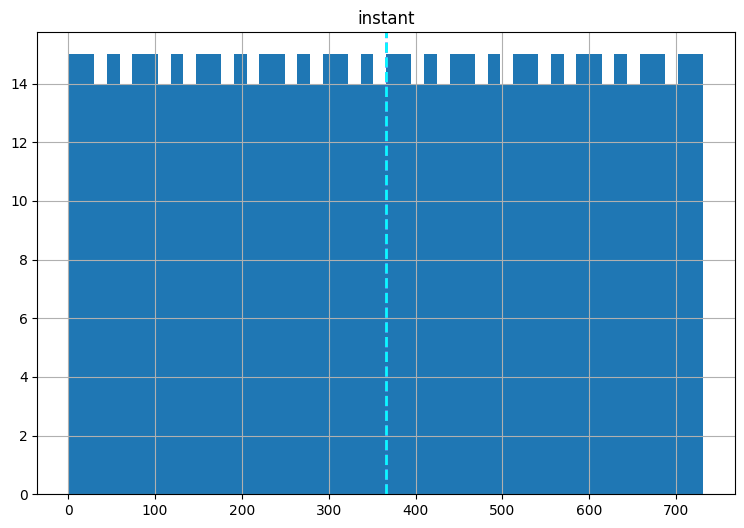

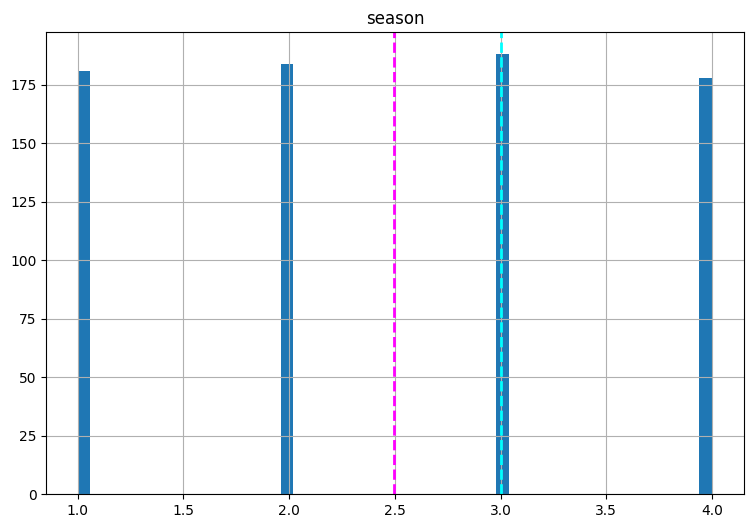

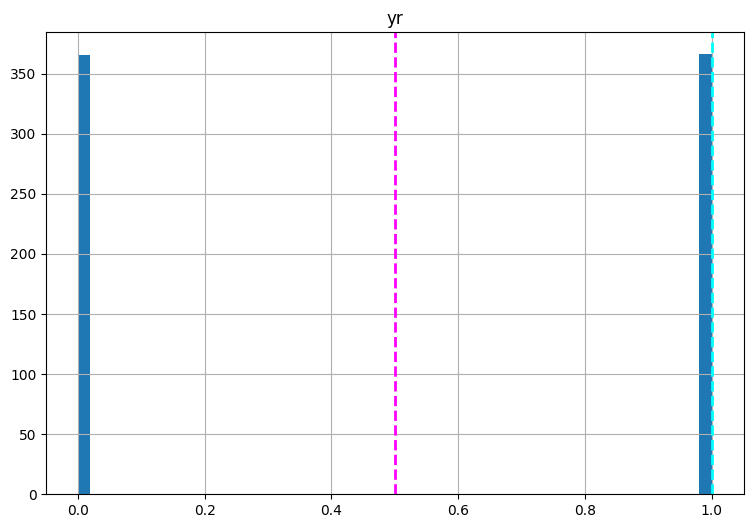

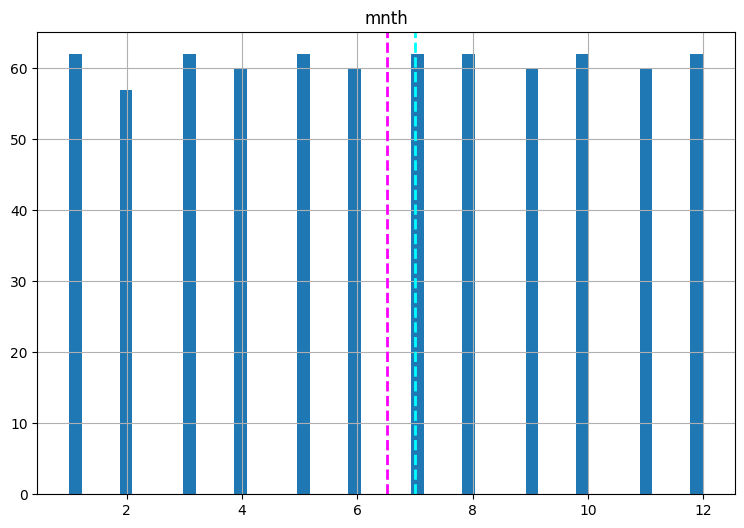

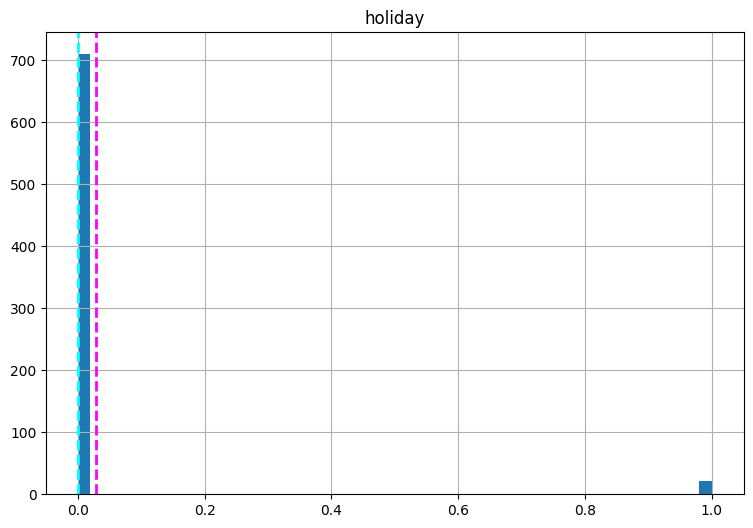

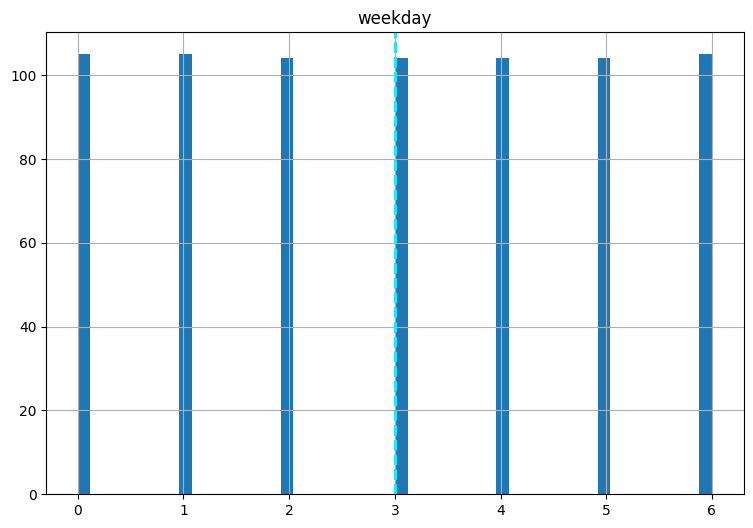

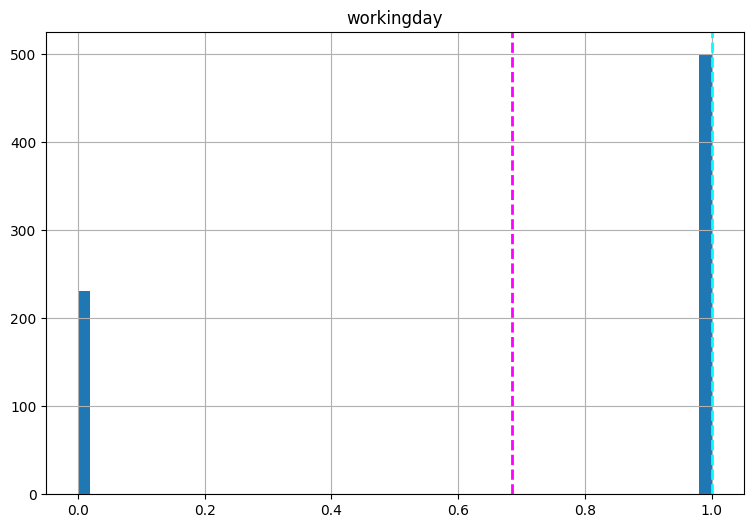

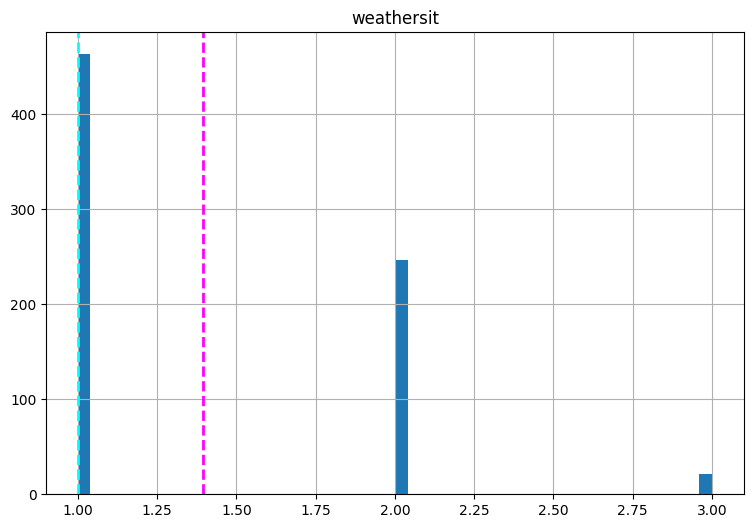

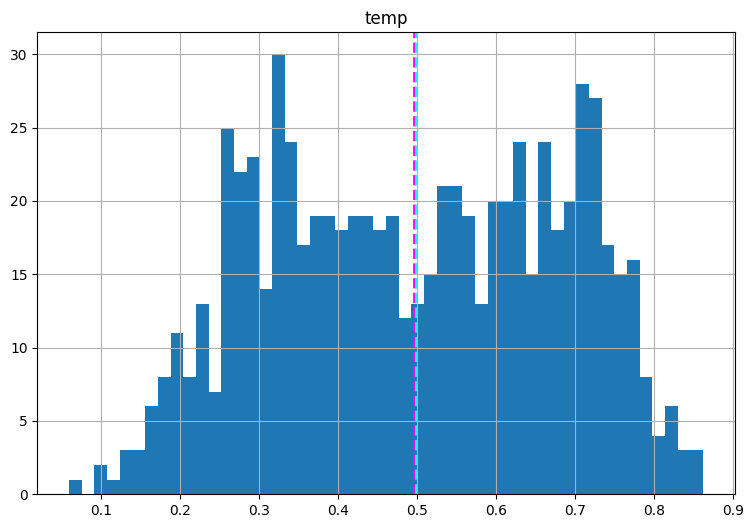

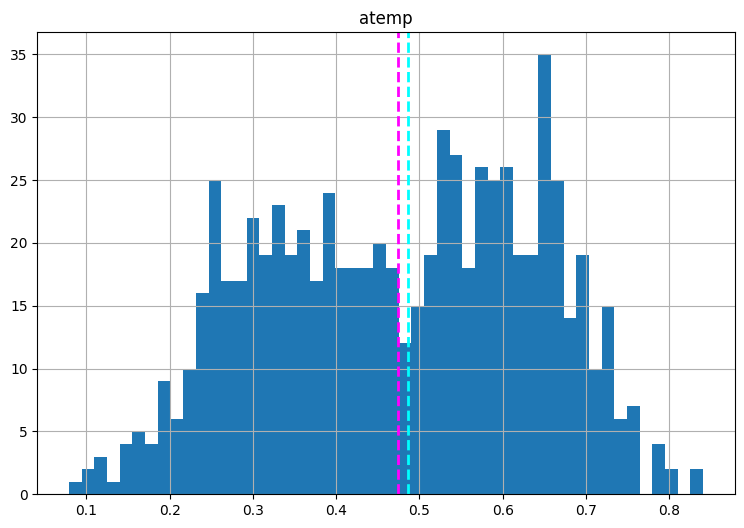

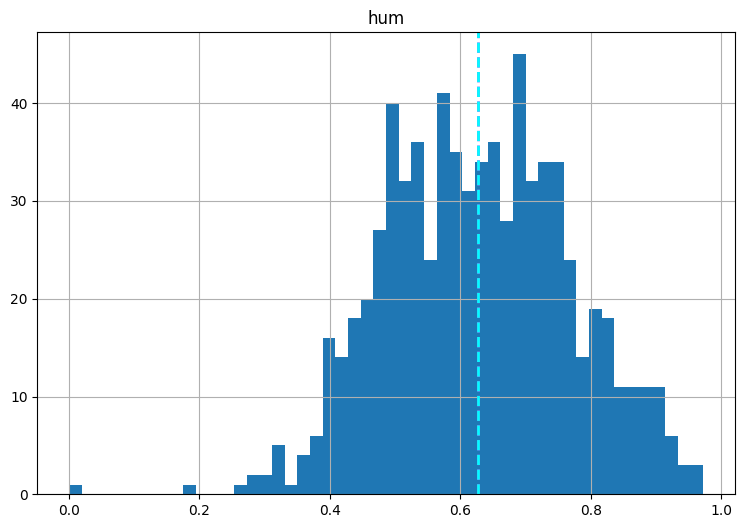

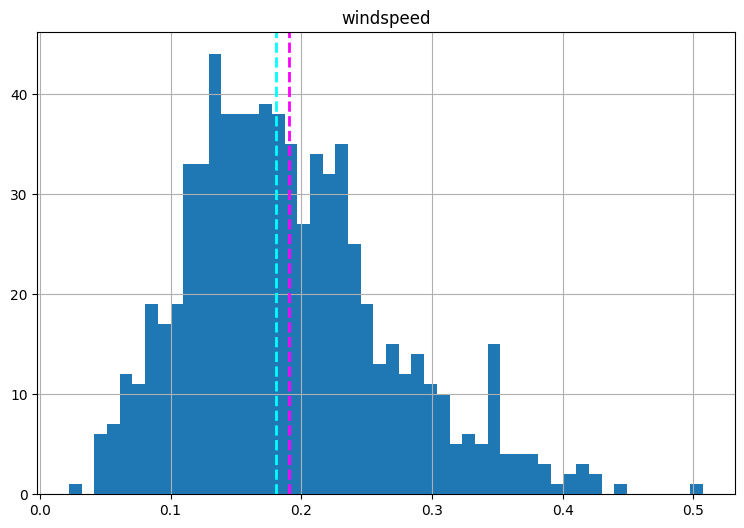

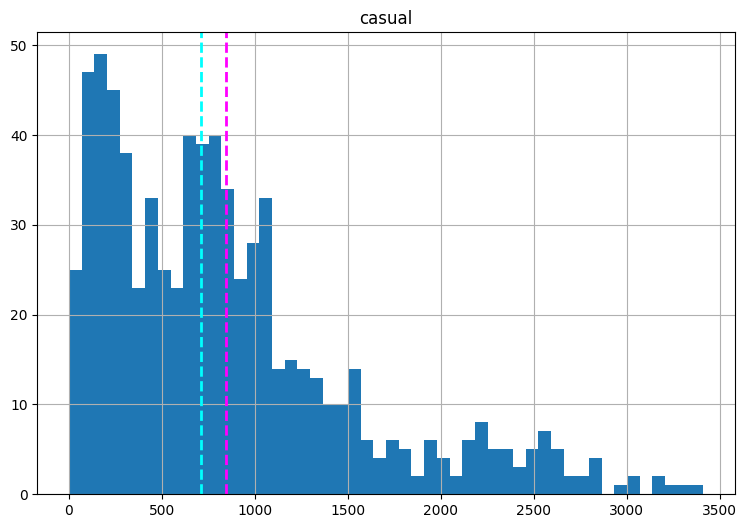

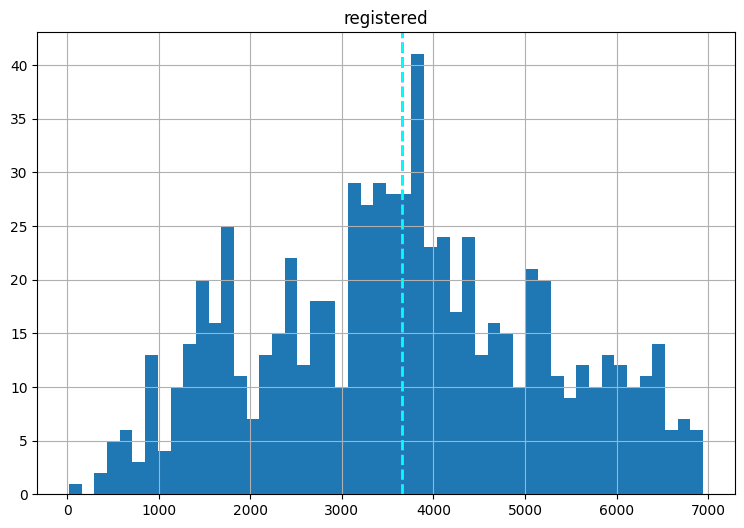

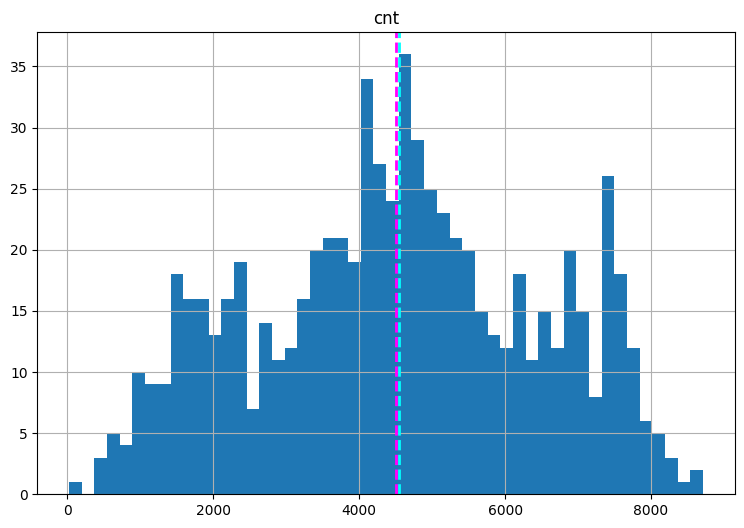

In [26]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

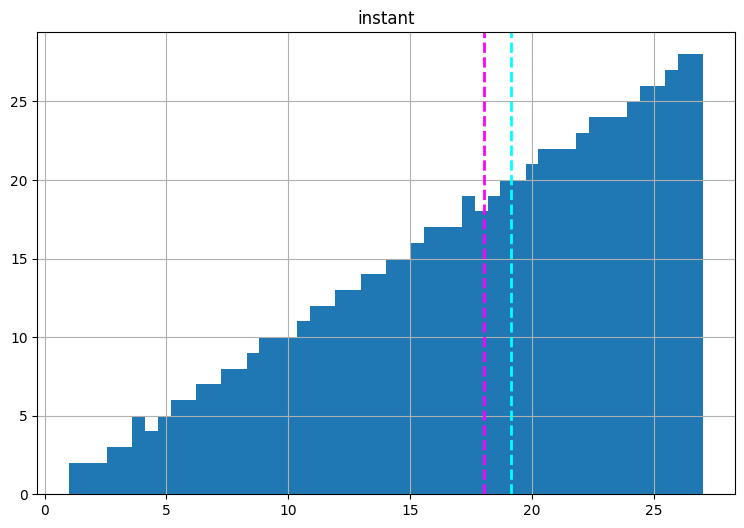

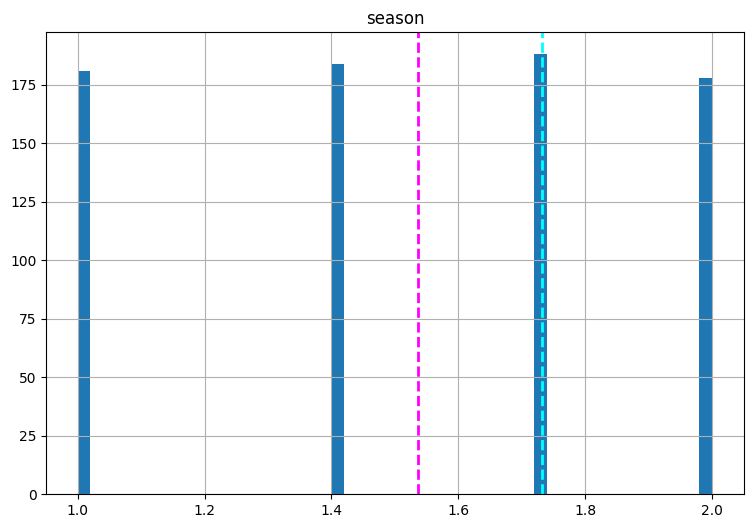

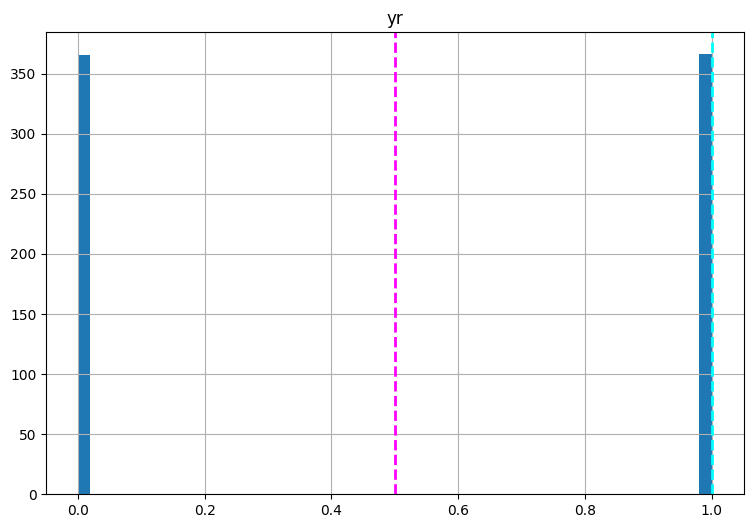

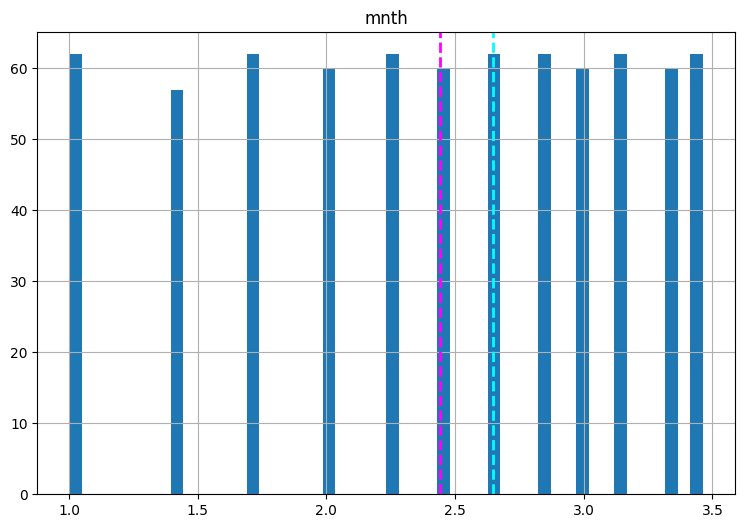

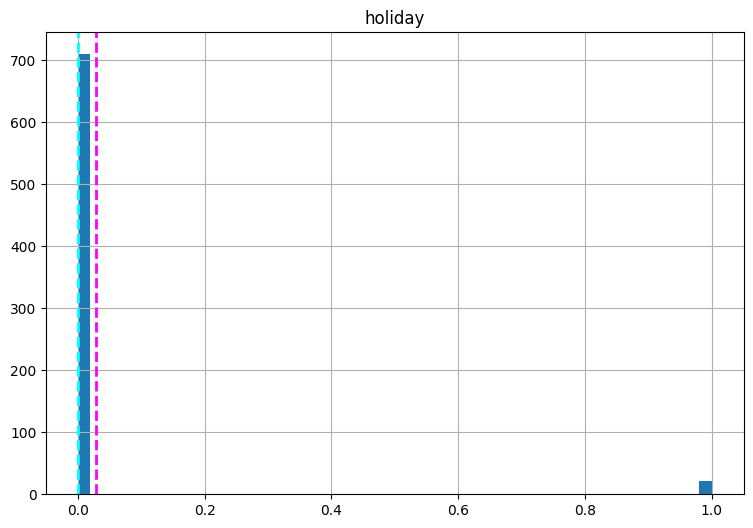

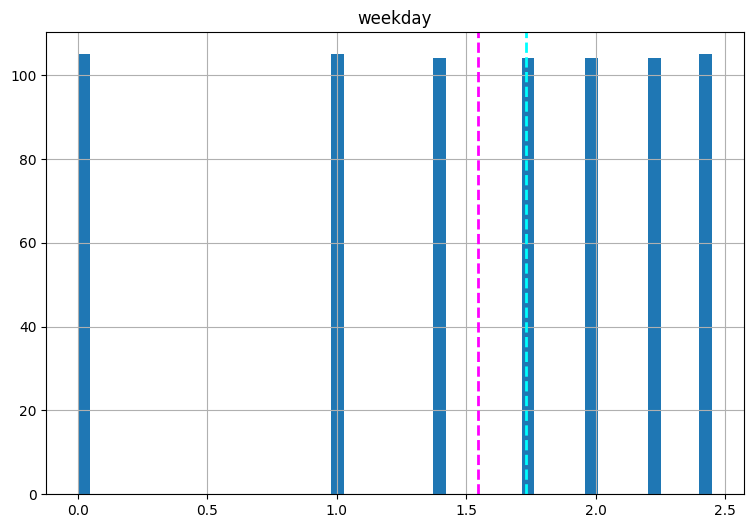

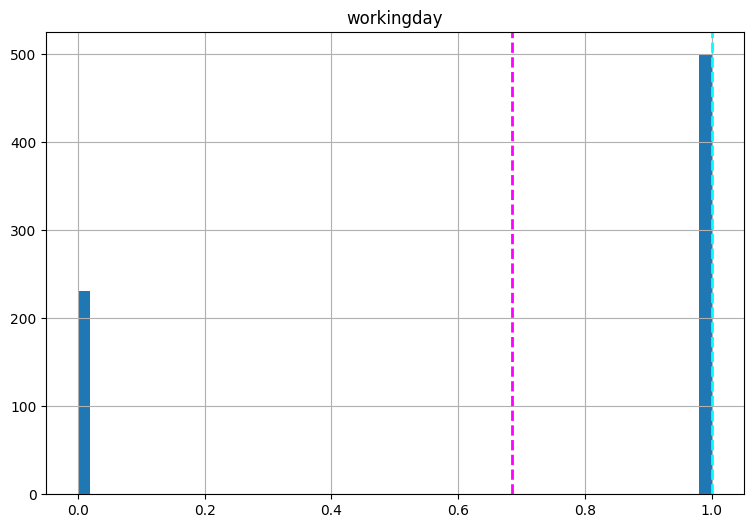

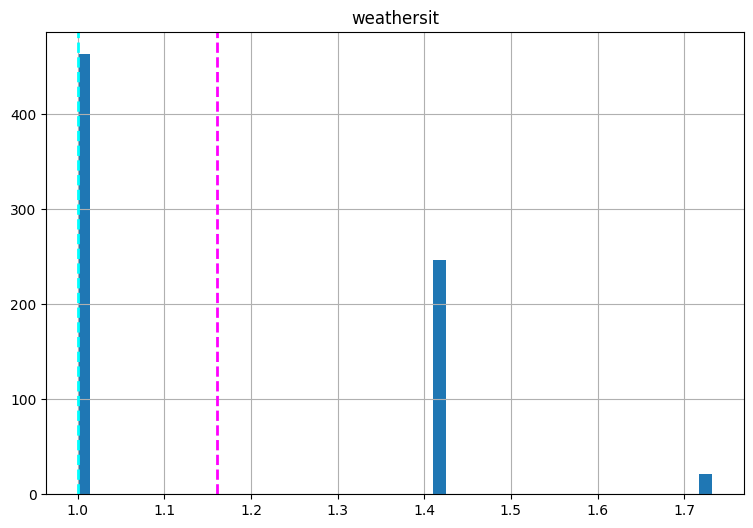

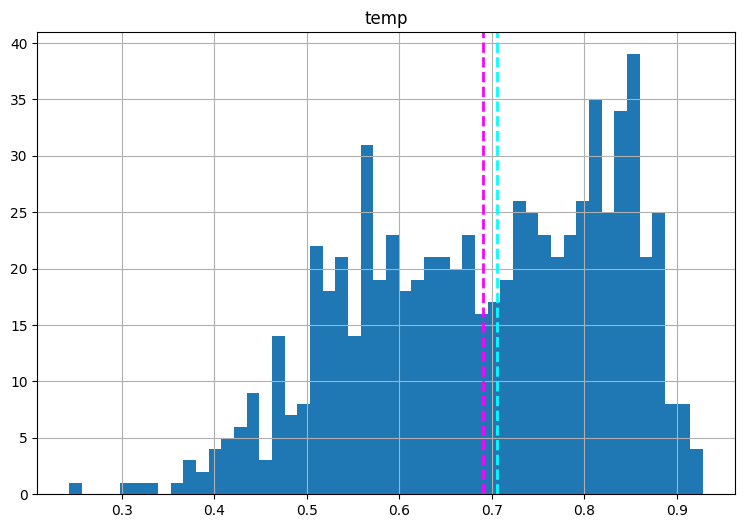

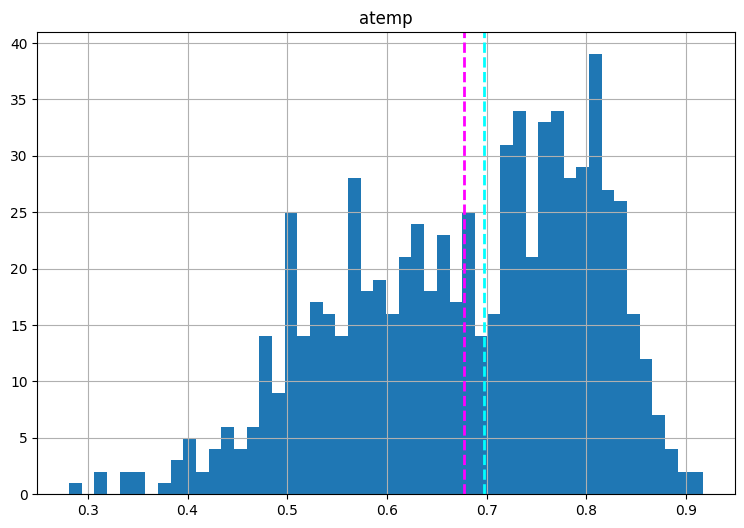

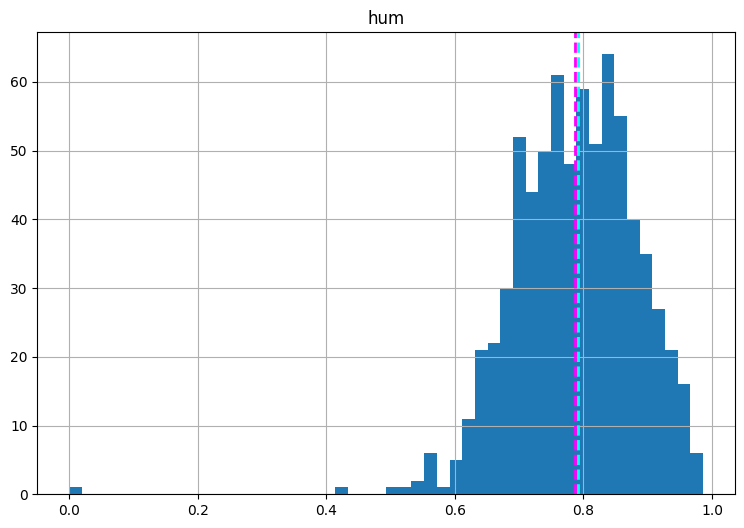

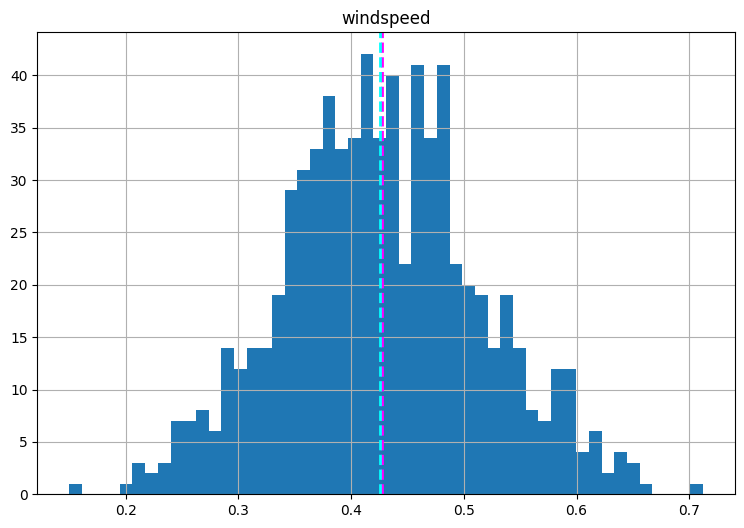

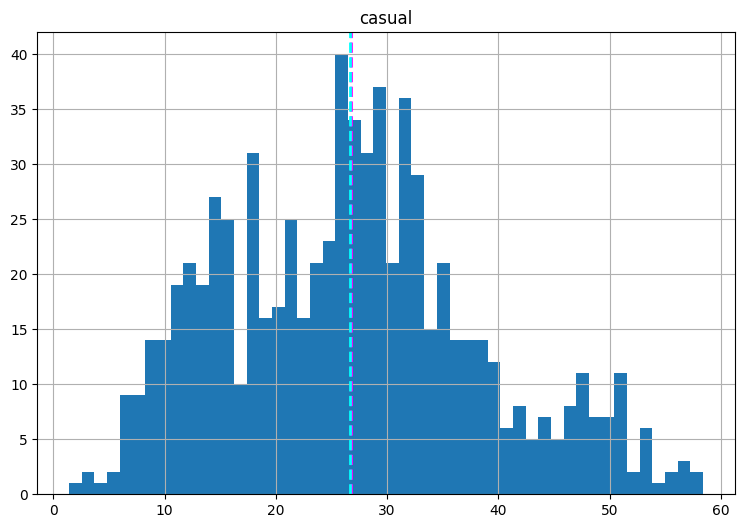

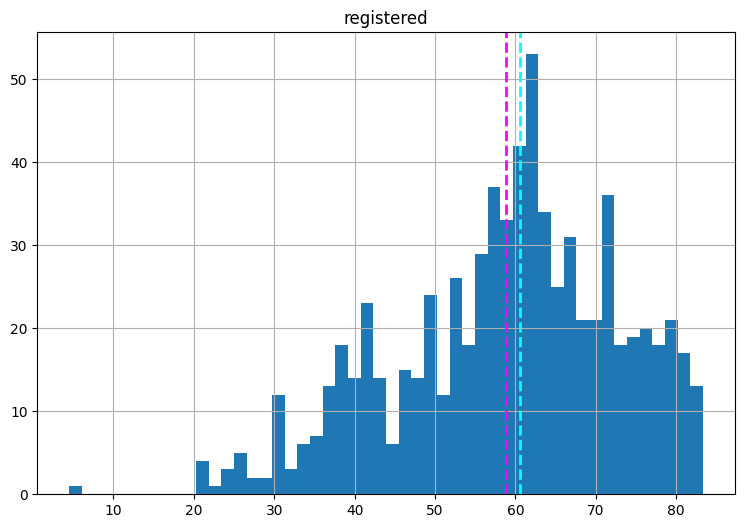

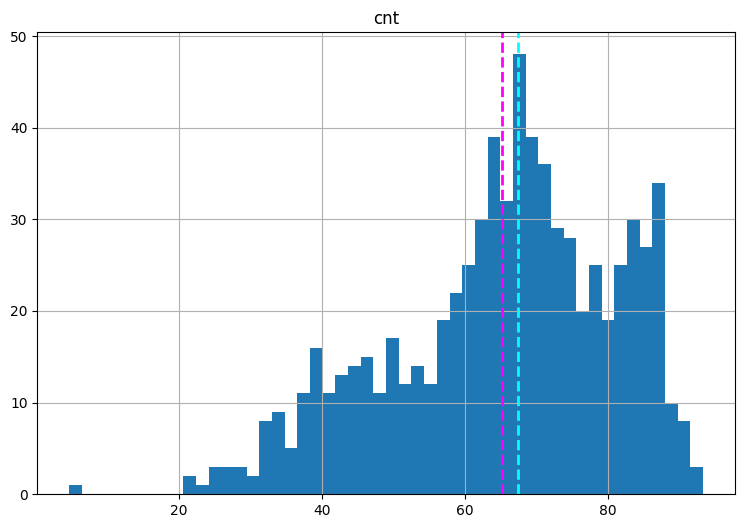

In [27]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

<Axes: >

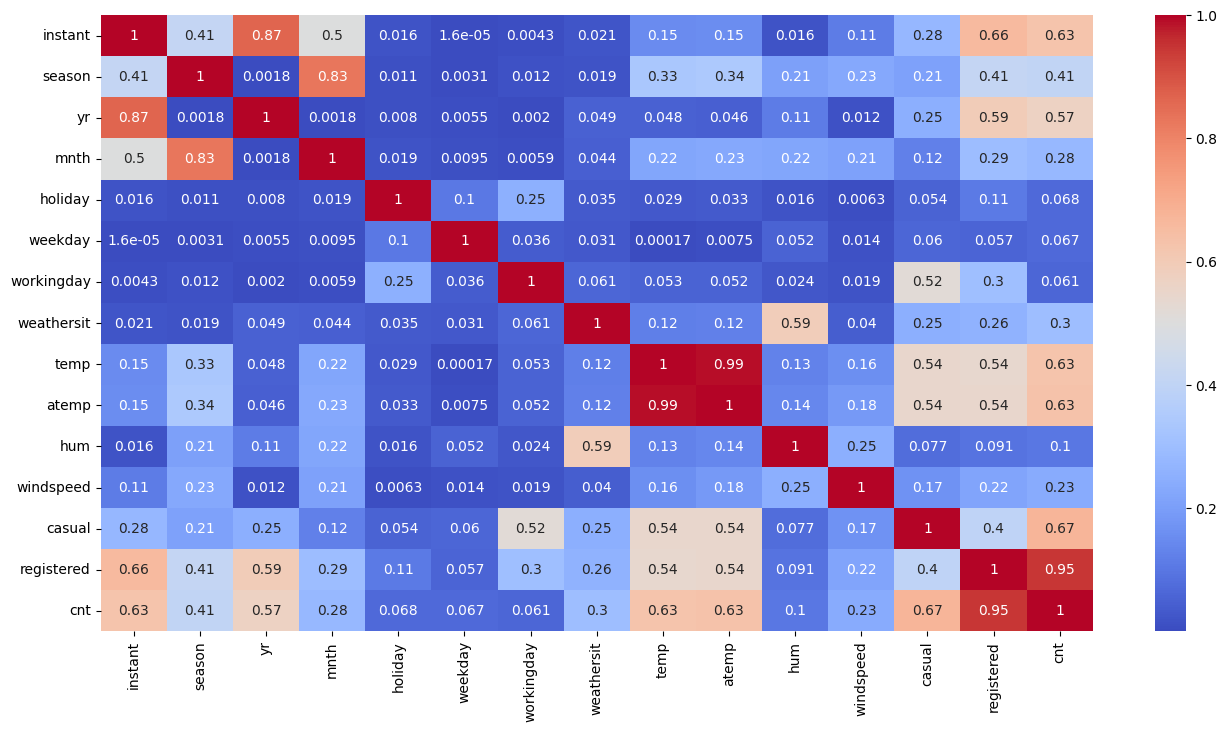

In [28]:
 ## Correlation
plt.figure(figsize=(16,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [29]:
df.head(1)

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1       1   0     1        0        6           0           2   

       temp     atemp       hum  windspeed  casual  registered  cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654  985

In [30]:
df.drop('atemp',inplace=True,axis=1)

In [26]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])


variables          VIF
0      instant  2179.637740
1       season    24.795085
2           yr   834.078467
3         mnth   632.943083
4      holiday     1.109992
5      weekday     3.266231
6   workingday     9.443534
7   weathersit    14.567645
8         temp    20.647005
9          hum    26.008467
10   windspeed     5.513704
11      casual     8.552058
12  registered    38.762898

In [33]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum']]])


variables          VIF
0      instant  2155.902975
1       season    24.691353
2           yr   825.260266
3         mnth   623.806847
4      holiday     1.103765
5      weekday     3.258822
6   workingday     9.353818
7   weathersit     7.764580
8         temp    19.401277
9    windspeed     5.485211
10      casual     8.525618
11  registered    38.758673

In [34]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed']]])


variables          VIF
0      instant  2088.027312
1       season    24.638134
2           yr   795.846954
3         mnth   605.549397
4      holiday     1.096943
5      weekday     3.154957
6   workingday     9.184793
7   weathersit     7.250810
8         temp    18.766511
9       casual     8.522639
10  registered    38.174830

In [35]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered']]])


variables          VIF
0     instant  2073.367982
1      season    21.394445
2          yr   779.003953
3        mnth   602.047699
4     holiday     1.096028
5     weekday     3.133484
6  workingday     5.874554
7  weathersit     5.786123
8        temp    15.993564
9      casual     7.606587

In [36]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp']]])


variables          VIF
0     instant  2068.658508
1      season    20.813784
2          yr   777.877992
3        mnth   600.855952
4     holiday     1.083603
5     weekday     3.129926
6  workingday     3.872125
7  weathersit     5.502632
8      casual     3.679987

In [37]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth']]])


variables        VIF
0     instant  52.095814
1      season  20.091808
2          yr  22.299067
3     holiday   1.076129
4     weekday   3.106730
5  workingday   3.732275
6  weathersit   5.045891
7      casual   3.541158

In [38]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth','instant']]])


variables       VIF
0      season  5.970934
1          yr  2.194535
2     holiday  1.075120
3     weekday  3.102463
4  workingday  3.684195
5  weathersit  5.045882
6      casual  3.452299

In [39]:
print(df.columns.tolist())


['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [40]:

# Create dummy variables for the categorical variable 'season'
df['Season1'] = np.where(df['season'] == 1, 1, 0)
df['Season2'] = np.where(df['season'] == 2, 1, 0)
df['Season3'] = np.where(df['season'] == 3, 1, 0)
df['Season4'] = np.where(df['season'] == 4, 1, 0)

# Drop the original 'season' column
df.drop(columns=['season'], axis=1, inplace=True)
df.head()


instant  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0        1   0     1        0        6           0           2  0.344167   
1        2   0     1        0        0           0           2  0.363478   
2        3   0     1        0        1           1           1  0.196364   
3        4   0     1        0        2           1           1  0.200000   
4        5   0     1        0        3           1           1  0.226957   

        hum  windspeed  casual  registered   cnt  Season1  Season2  Season3  \
0  0.805833   0.160446     331         654   985        1        0        0   
1  0.696087   0.248539     131         670   801        1        0        0   
2  0.437273   0.248309     120        1229  1349        1        0        0   
3  0.590435   0.160296     108        1454  1562        1        0        0   
4  0.436957   0.186900      82        1518  1600        1        0        0   

   Season4  
0        0  
1        0  
2        0  
3        0  
4        0

In [41]:
df.drop('instant',inplace=True,axis=1)

In [42]:
df.drop('casual',inplace=True,axis=1)

In [43]:
df.drop('registered',inplace=True,axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
 10  Season1     731 non-null    int64  
 11  Season2     731 non-null    int64  
 12  Season3     731 non-null    int64  
 13  Season4     731 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 80.1 KB


In [45]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
dependent_variable = 'cnt'

In [47]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['mnth',
 'temp',
 'windspeed',
 'Season3',
 'holiday',
 'Season1',
 'weathersit',
 'Season2',
 'yr',
 'weekday',
 'hum',
 'workingday',
 'Season4']

In [48]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
X_train[0:10]

yr  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
97    0     4        0        5           1           2  0.335833  0.836250   
503   1     5        0        5           1           1  0.564167  0.523333   
642   1    10        0        4           1           2  0.657500  0.722917   
498   1     5        0        0           0           1  0.612500  0.576250   
303   0    10        0        1           1           1  0.340000  0.703333   
570   1     7        0        2           1           1  0.750833  0.655000   
250   0     9        0        4           1           3  0.633913  0.939565   
17    0     1        0        2           1           2  0.216667  0.861667   
595   1     8        0        6           0           1  0.678333  0.603333   
240   0     8        0        1           1           1  0.636667  0.554583   

     windspeed  Season1  Season2  Season3  Season4  
97    0.226992        0        1        0        0  
503   0.136817        0        1        0        0  
642   0.117546        0        0        0        1  
498   0.225117        0        1        0        0  
303   0.106350        0        0        0        1  
570   0.211454        0        0        1        0  
250   0.192748        0        0        1        0  
17    0.146775        1        0        0        0  
595   0.177867        0        0        1        0  
240   0.159825        0        0        1        0

In [51]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 13)
(584,)
(147, 13)
(147,)


In [53]:
X_train[0:10]

array([[0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.35024023, 0.80442593, 0.48605788, 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 0.36363636, 0.        , 0.83333333, 1.        ,
        0.        , 0.63925722, 0.35526299, 0.24873701, 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 0.81818182, 0.        , 0.66666667, 1.        ,
        0.5       , 0.75739478, 0.64174706, 0.19801995, 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.36363636, 0.        , 0.        , 0.        ,
        0.        , 0.7004354 , 0.43122037, 0.48112329, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.35551467, 0.61363607, 0.16855453, 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.54545455, 0.        , 0.33333333, 1.        ,
        0.        , 0.87553

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
# Cheeck coefficents
regressor.coef_

array([ 14.84173171,  -0.74396958,  -3.98683808,   2.75247988,
         0.75503377,  -9.16790664,  34.7301452 ,  -9.01635378,
       -10.65522142,  -7.03919376,   1.95715823,  -0.72929703,
         5.81133256])

In [56]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

Coefficient
yr            14.841732
mnth          -0.743970
holiday       -3.986838
weekday        2.752480
workingday     0.755034
weathersit    -9.167907
temp          34.730145
hum           -9.016354
windspeed    -10.655221
Season1       -7.039194
Season2        1.957158
Season3       -0.729297
Season4        5.811333

In [57]:
regressor.intercept_

np.float64(47.76195578708424)

In [58]:
regressor.score(X_train,y_train)

0.803862733561366

In [59]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [60]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.968830246067962.
The Mean Squred Error(MSE) is 43.23880331578452.
The Root Mean Squared Error(RMSE) is 6.575621895743742.
The R2 Score is 0.8477807529141589.
Adjusted R2 is 0.8329021798907308.


In [61]:
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [62]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.9688  43.2388  6.5756    0.8478       0.8329

In [63]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [64]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [65]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

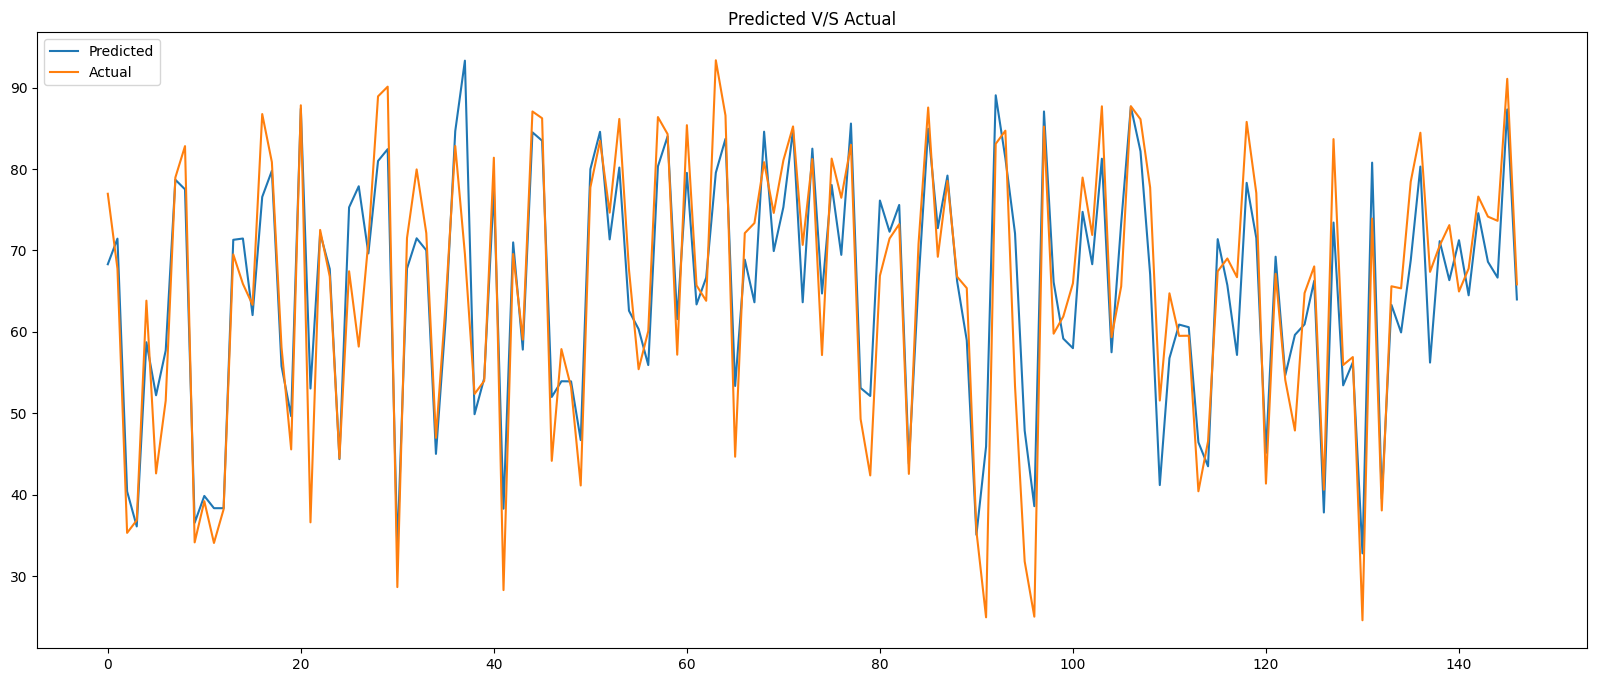

In [66]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

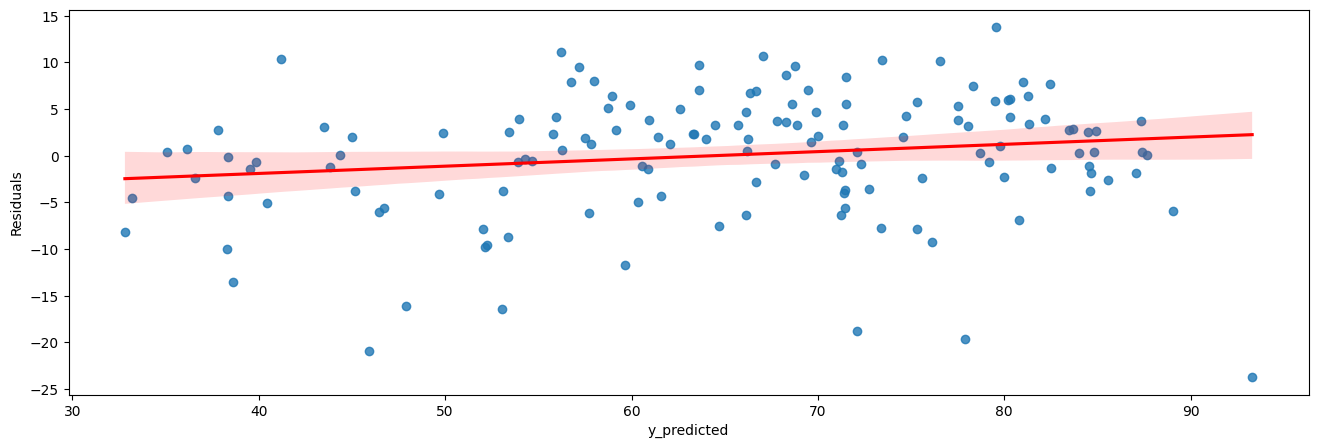

In [67]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

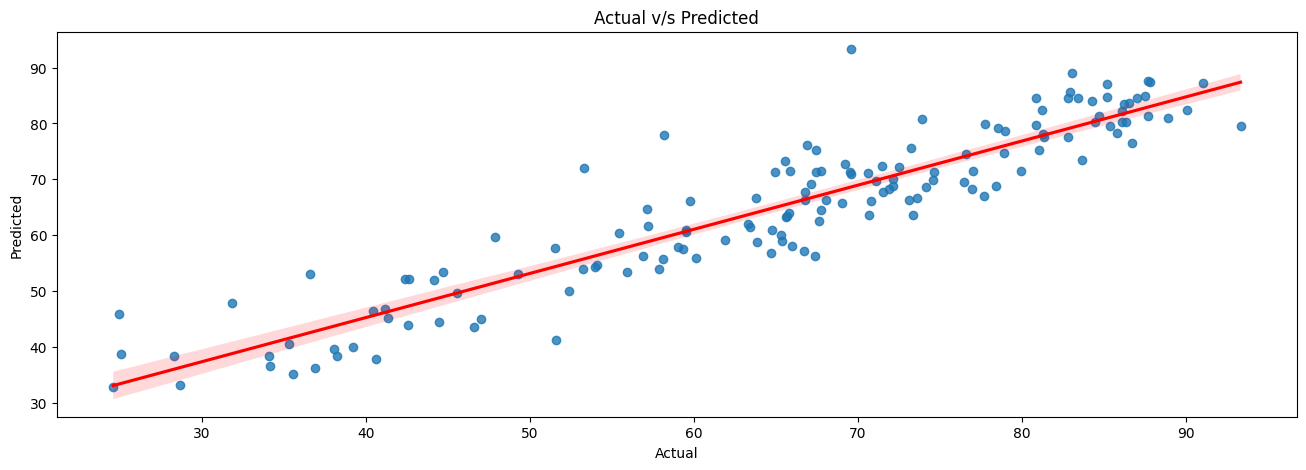

In [68]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_22756\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


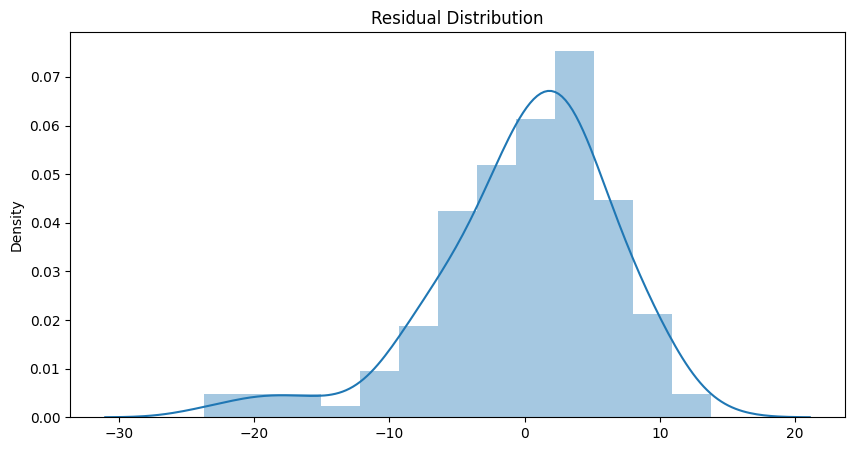

In [69]:
Residual_distPlot(y_pred,y_test)

In [70]:
lasso_reg = Lasso(alpha = 0.01)

In [71]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [72]:
lasso_reg.coef_

array([ 14.84566995,  -0.21763231,  -3.60973387,   2.66472775,
         0.75901796,  -9.25238518,  34.01022963,  -8.55591095,
       -10.30898628,  -9.04688575,   0.        ,  -2.58233373,
         3.44011467])

In [73]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
yr            14.845670
mnth          -0.217632
holiday       -3.609734
weekday        2.664728
workingday     0.759018
weathersit    -9.252385
temp          34.010230
hum           -8.555911
windspeed    -10.308986
Season1       -9.046886
Season2        0.000000
Season3       -2.582334
Season4        3.440115

In [74]:
lasso_reg.intercept_

np.float64(49.6185467013491)

In [75]:
lasso_reg.score(X_train,y_train)

0.8037413397332207

In [76]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [77]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.987196779764263.
 The Mean Squred Error(MSE) is 43.43940566928043.
The Root Mean Squared Error(RMSE) is 6.590857733958489.
The R2 Score is 0.847074546061259.
Adjusted R2 is 0.8321269453003294.


In [78]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

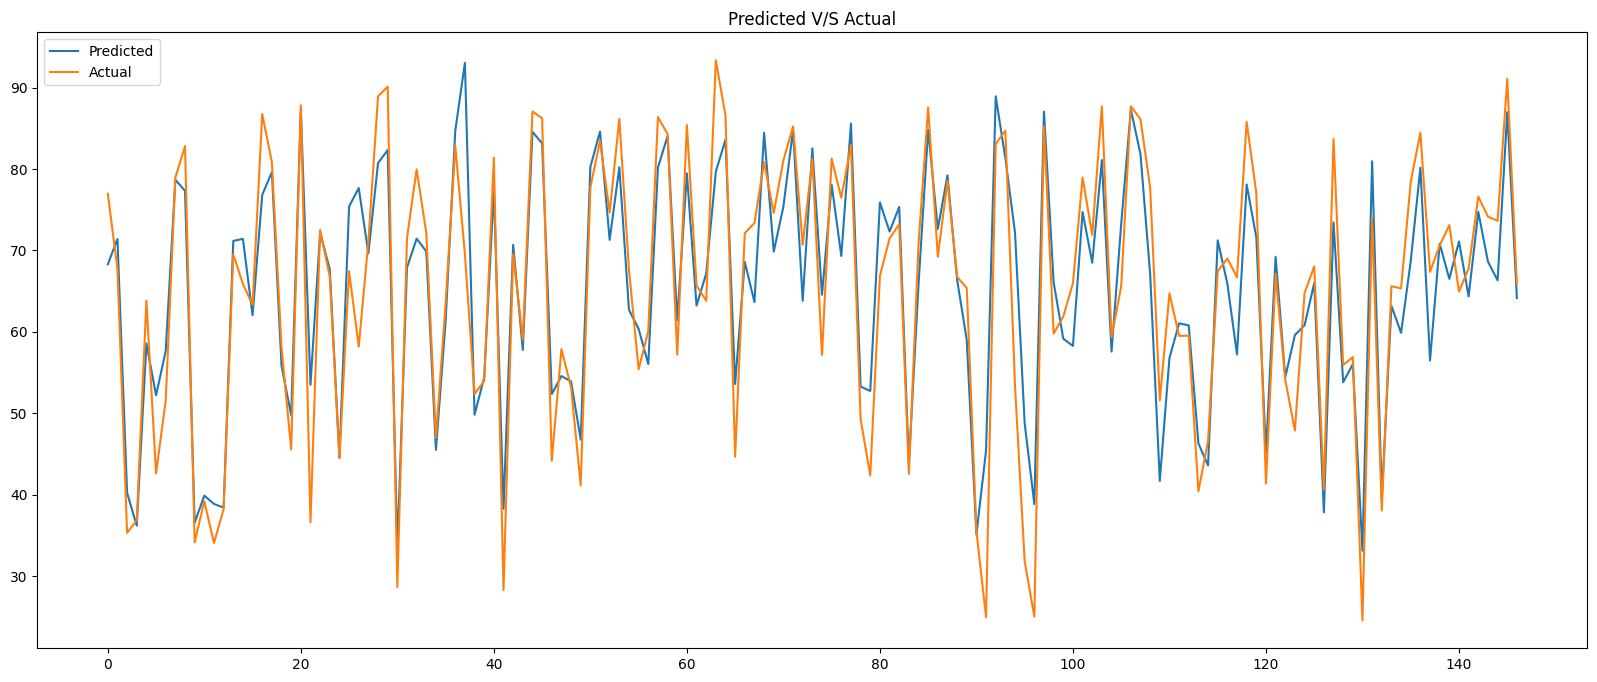

In [79]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

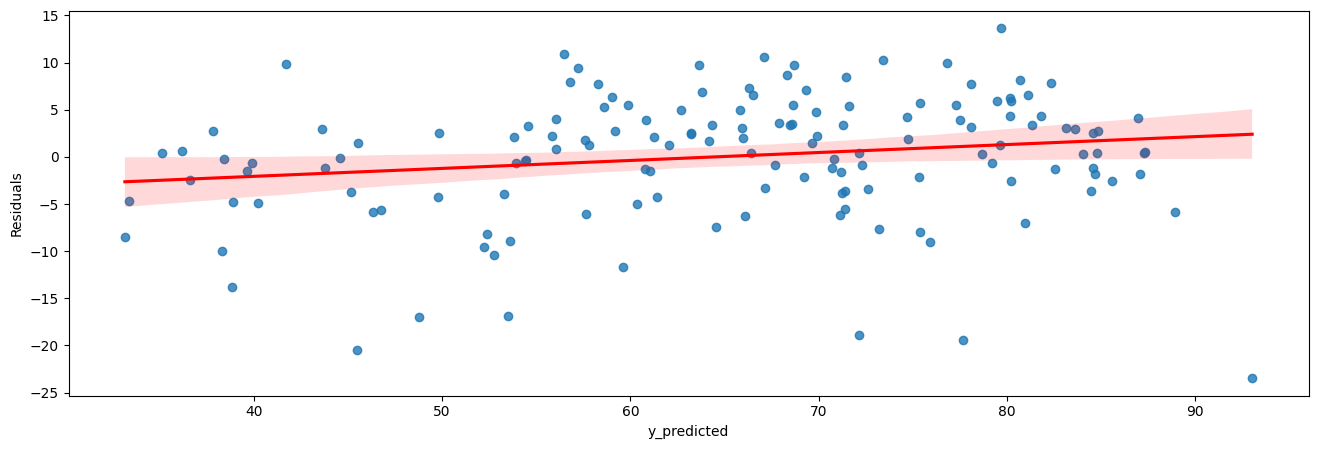

In [80]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

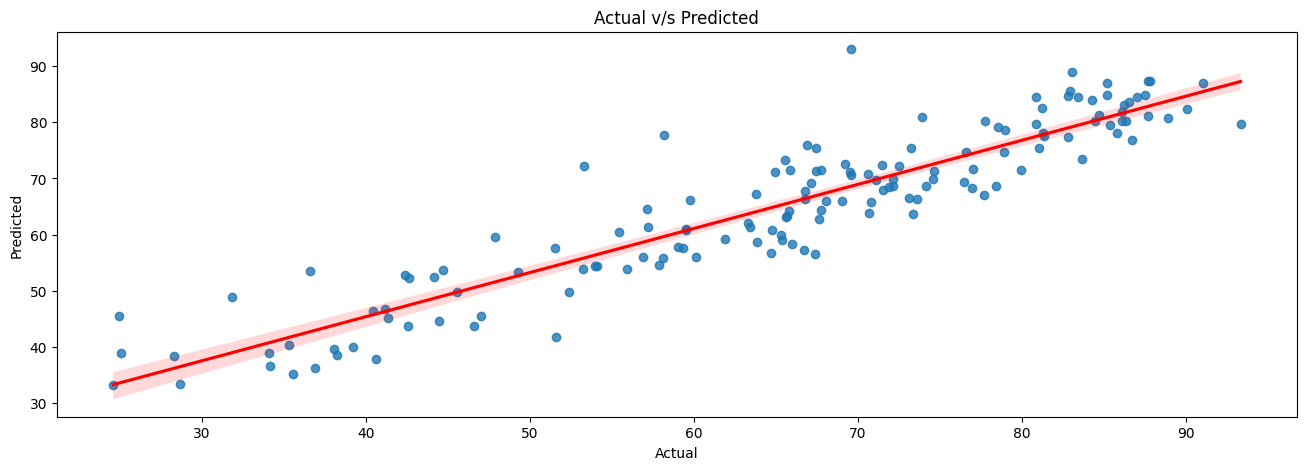

In [81]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_22756\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


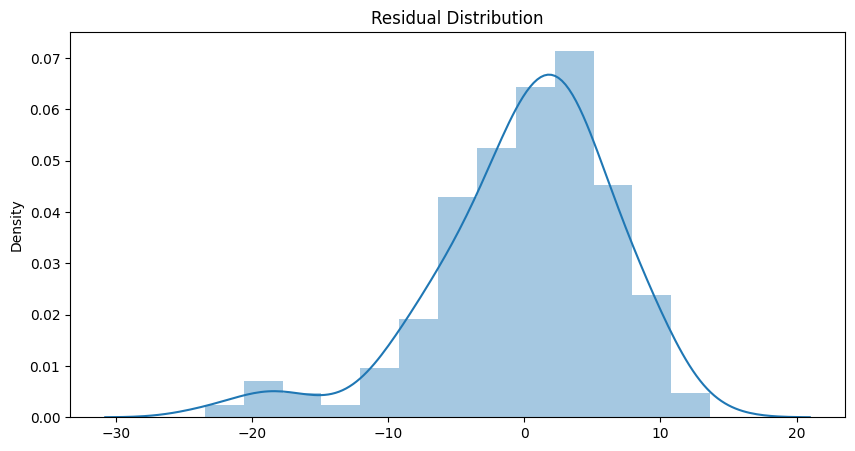

In [82]:
Residual_distPlot(y_pred,y_test)

In [83]:
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  4.9688  43.2388  6.5756    0.8478       0.8329
1              Lasso  4.9872  43.4394  6.5909    0.8471       0.8321

In [84]:
ridge_reg = Ridge(alpha = 0.01)

In [85]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [86]:
ridge_reg.coef_

array([ 14.84233069,  -0.74064125,  -3.98339691,   2.75190198,
         0.75583397,  -9.17252663,  34.6930981 ,  -9.0039459 ,
       -10.64968681,  -7.04636804,   1.95993662,  -0.71941865,
         5.80585007])

In [87]:
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
yr            14.842331
mnth          -0.740641
holiday       -3.983397
weekday        2.751902
workingday     0.755834
weathersit    -9.172527
temp          34.693098
hum           -9.003946
windspeed    -10.649687
Season1       -7.046368
Season2        1.959937
Season3       -0.719419
Season4        5.805850

In [88]:
ridge_reg.intercept_

np.float64(47.77234737587433)

In [89]:
ridge_reg.score(X_train,y_train)

0.8038626328569279

In [90]:
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

In [91]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.96895232171503.
 The Mean Squred Error(MSE) is 43.234818894496726.
The Root Mean Squared Error(RMSE) is 6.575318919603575.
The R2 Score is 0.847794779796542.
Adjusted R2 is 0.8329175778217679.


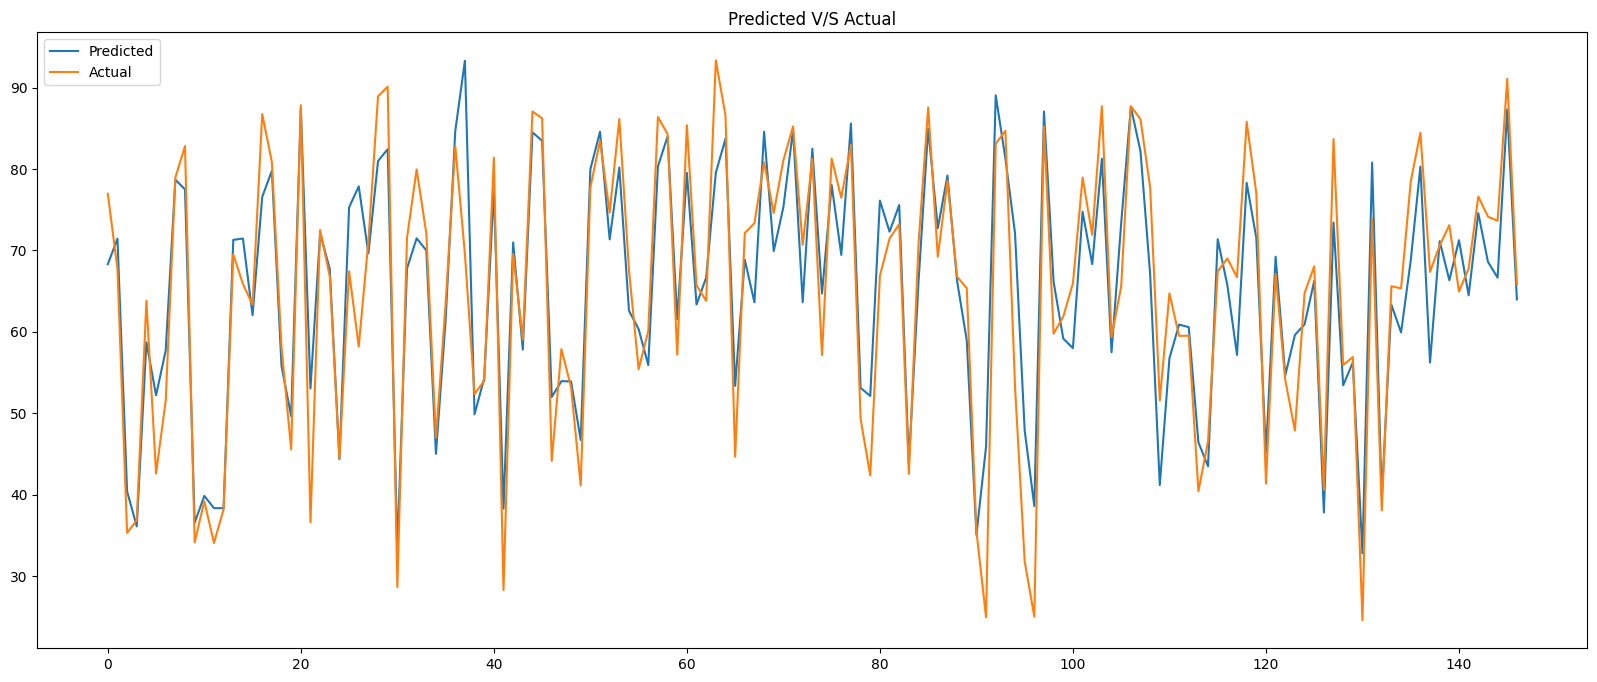

In [92]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

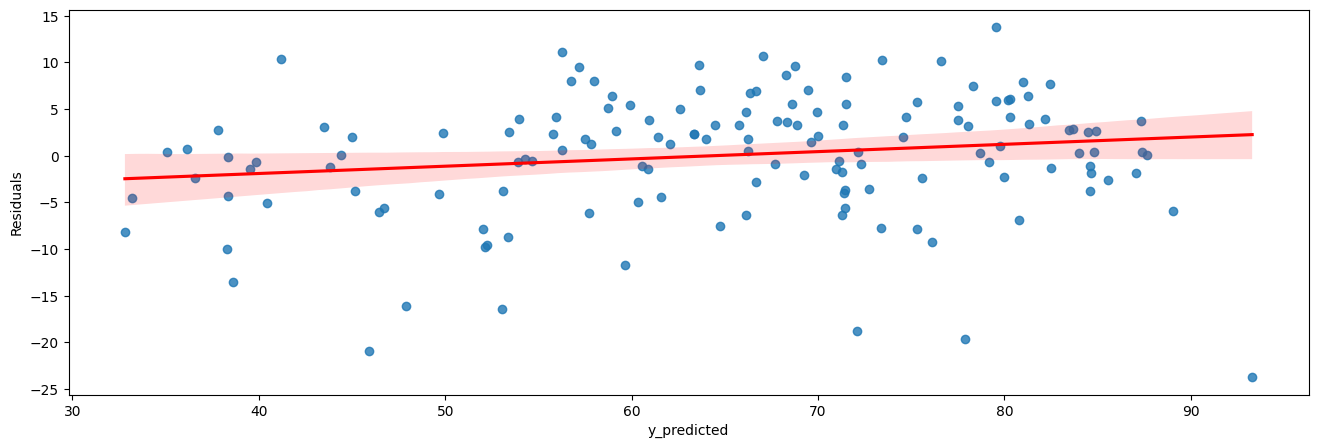

In [93]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

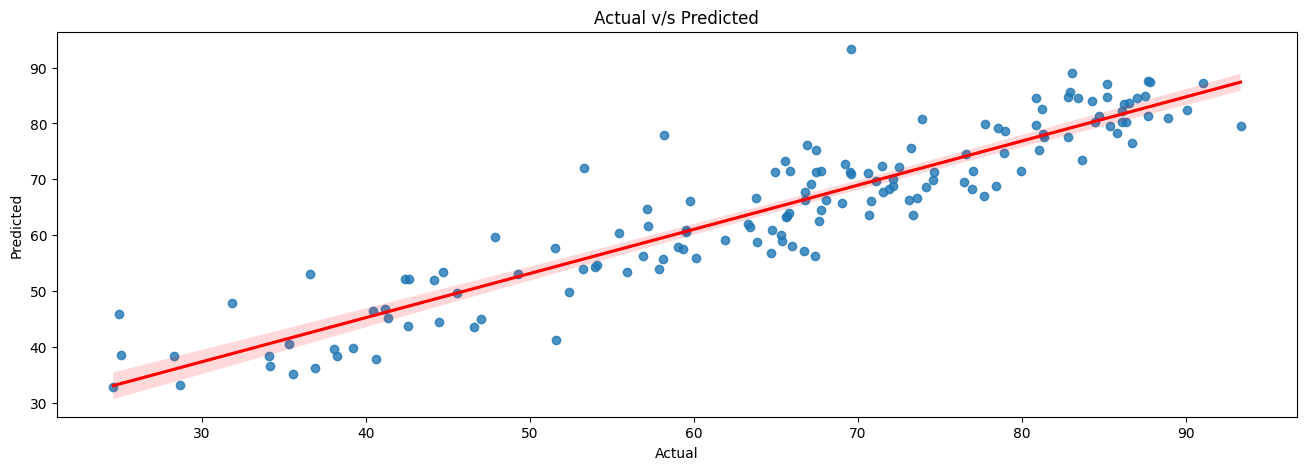

In [94]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_22756\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


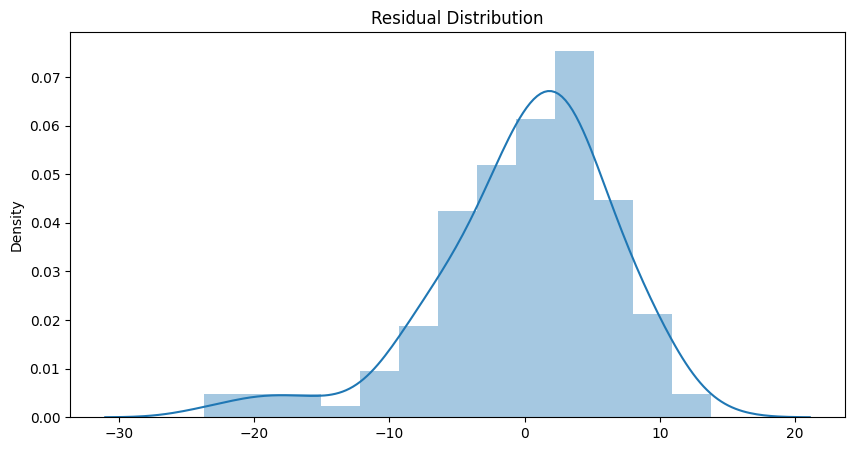

In [95]:
Residual_distPlot(y_pred,y_test)

In [ ]:
# creating object of elastic net
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

c:\Users\gotlu\OneDrive\Desktop\Infosys\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+04, tolerance: 1.395e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1e-05, l1_ratio=0.3)

In [338]:
elastic_net_reg.score(X_test,y_test)

0.8477872093072302

In [339]:
elastic_net_reg.score(X_test,y_test)

0.8477872093072302

In [340]:
# predicting Y train values from train data set
y_pred_train = elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred = elastic_net_reg.predict(X_test)

In [341]:
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.968874316882125.
The Mean Squred Error(MSE) is 43.236969338048574.
The Root Mean Squared Error(RMSE) is 6.57548244146759.
The R2 Score is 0.8477872093072302.
Adjusted R2 is 0.8329092673598166.


In [342]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

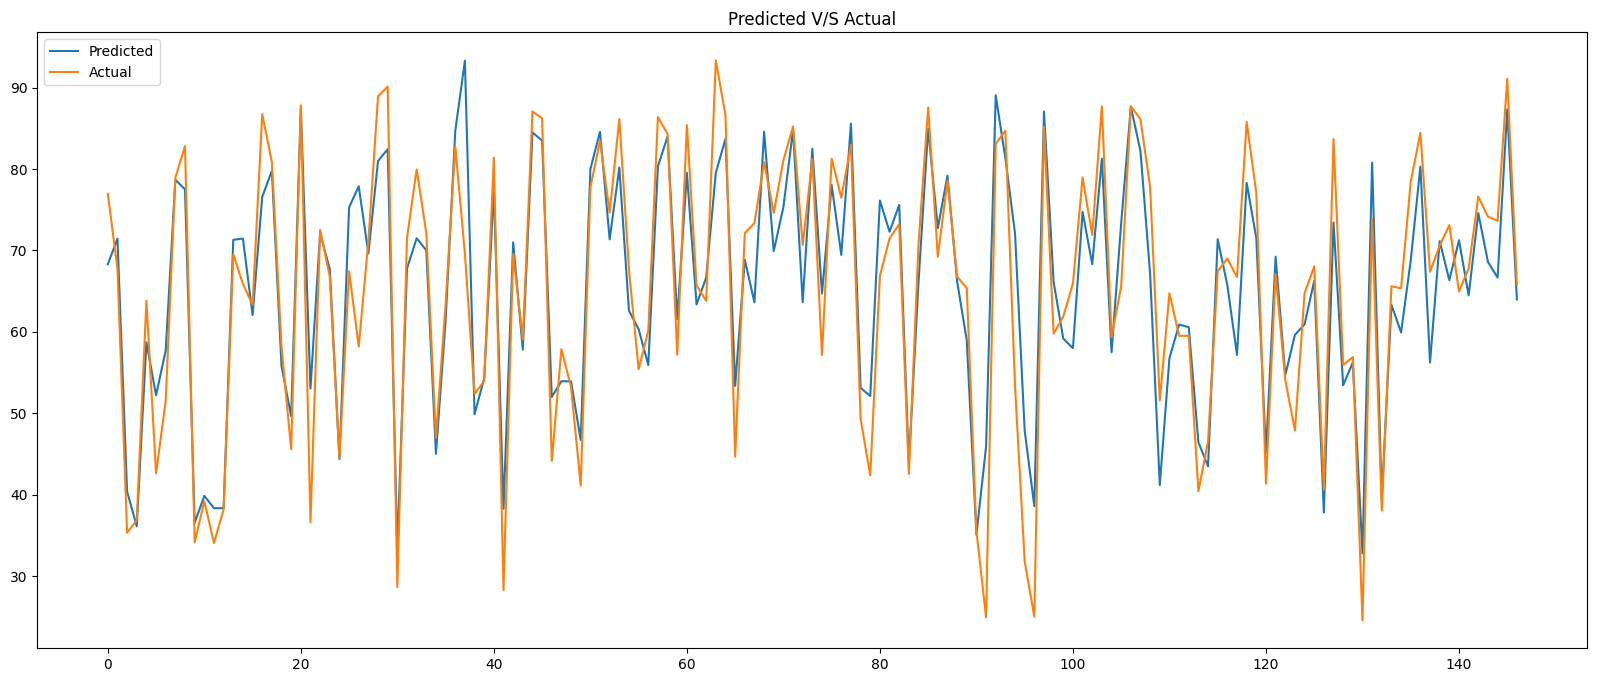

In [346]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

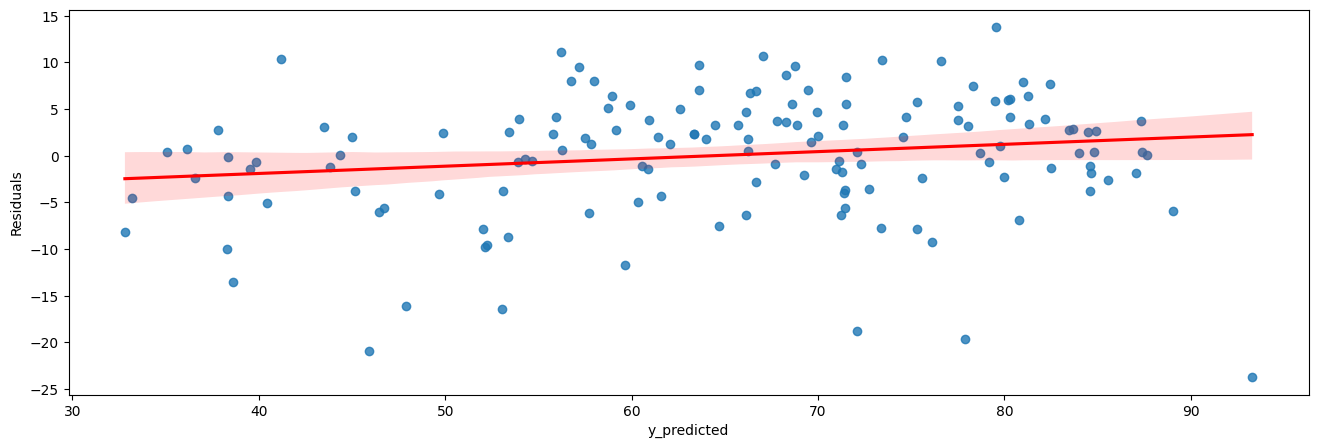

In [347]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

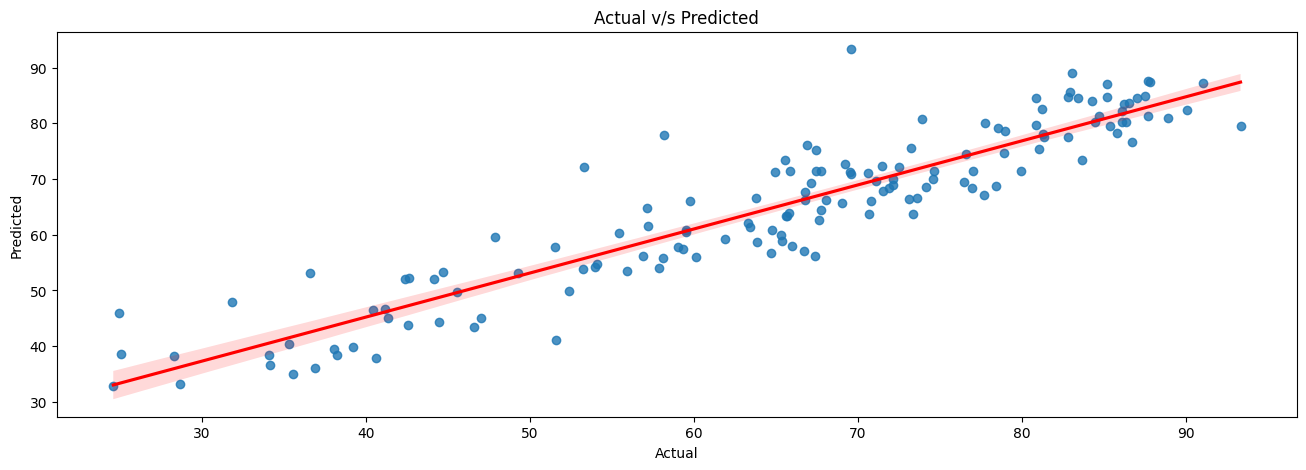

In [348]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_30876\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


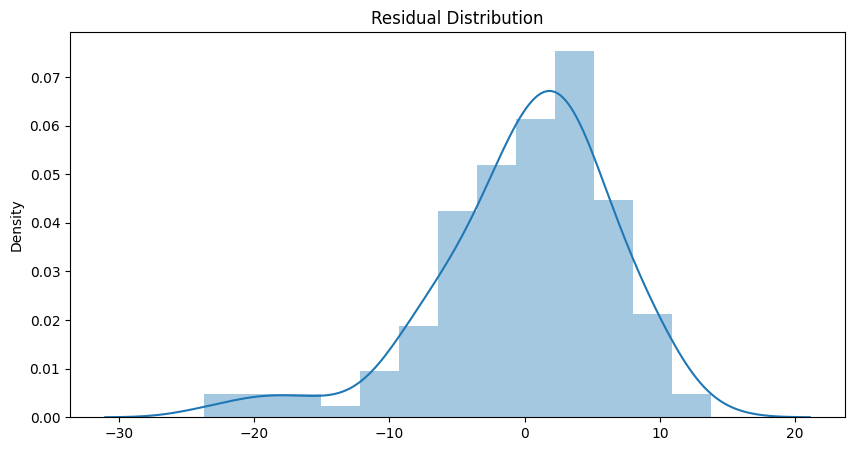

In [349]:
Residual_distPlot(y_pred,y_test)

In [351]:
from sklearn.tree import DecisionTreeRegressor
D_tree = DecisionTreeRegressor(max_depth=9, splitter='best', max_features=None, random_state=42)
# Fit model
D_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=9, random_state=42)

In [352]:
D_tree.score(X_test,y_test)

0.8169429666756992

In [353]:
#  predicting y_train_predictions from  X train values
y_pred_train = D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred = D_tree.predict(X_test)

In [354]:
#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.949777847343124.
The Mean Squred Error(MSE) is 51.998464129945724.
The Root Mean Squared Error(RMSE) is 7.21099605671406.
The R2 Score is 0.8169429666756992.
Adjusted R2 is 0.7990501739447525.


In [355]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

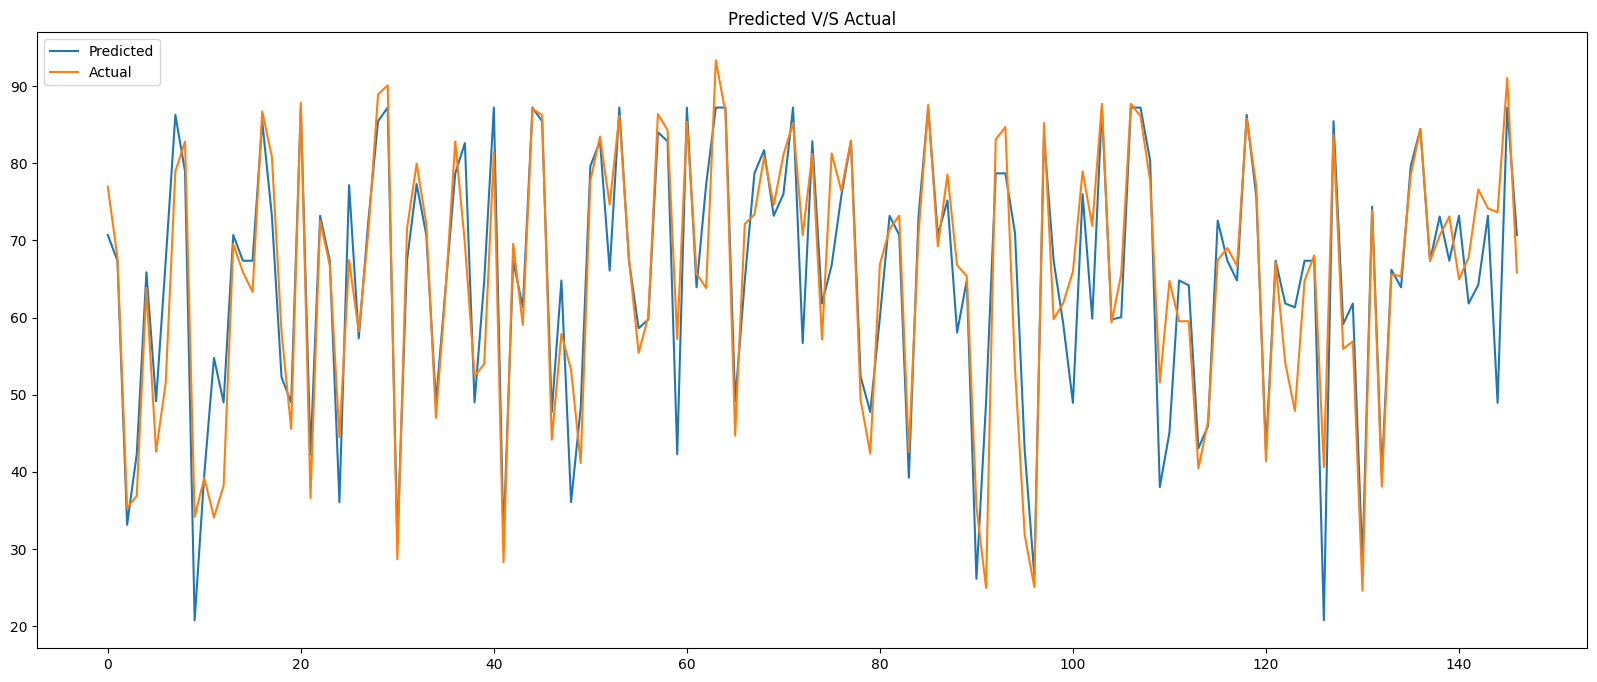

In [356]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

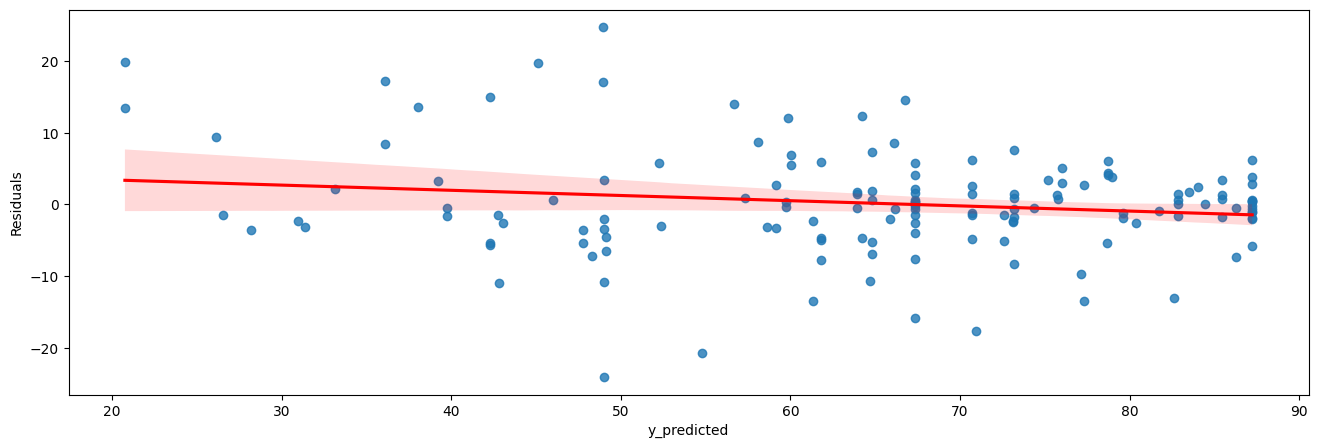

In [357]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

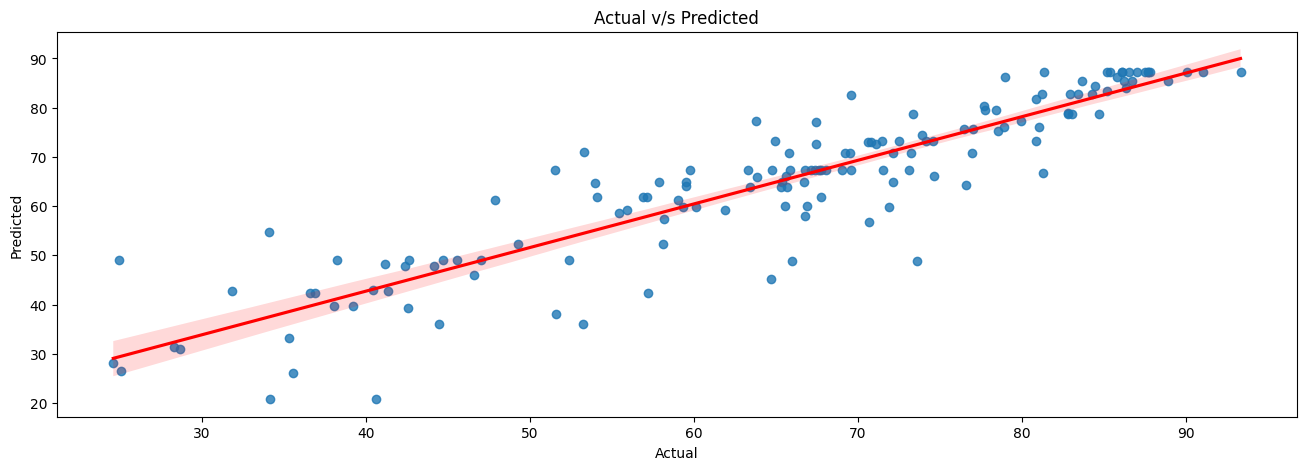

In [358]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_30876\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


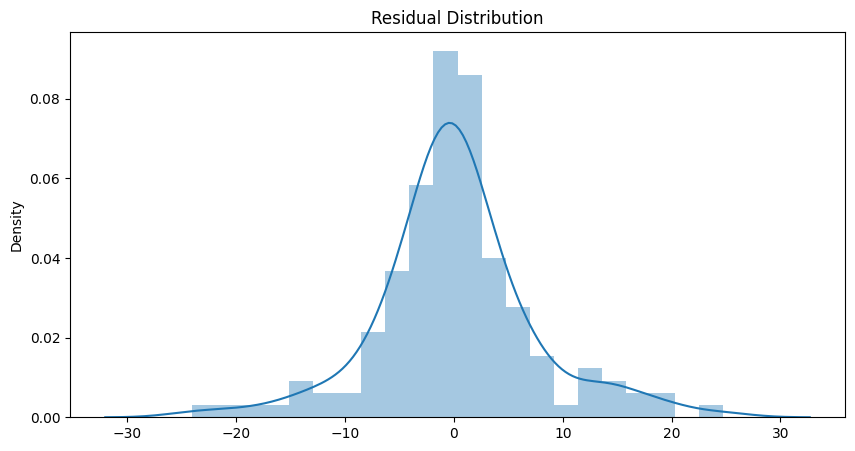

In [359]:
Residual_distPlot(y_pred,y_test)

In [364]:
# create an object
rf = RandomForestRegressor()

# fitting Xtrain yTrain
rf.fit(X_train,y_train)


RandomForestRegressor()

In [365]:
rf.score(X_test,y_test)

0.8754434697250247

In [366]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [367]:
# Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

# Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

# Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.148886259383753.
The Mean Squred Error(MSE) is 35.38104029130472.
The Root Mean Squared Error(RMSE) is 5.948196389772678.
The R2 Score is 0.8754434697250247.
Adjusted R2 is 0.8632687712770948.


In [368]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [369]:
#GridSearchCV On Random Forest
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [370]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [371]:
# print best parameters and best score
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 50}
The best negative mean squred error value is -38.972148805548954


In [372]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=80)

In [373]:
rf_rg.score(X_test,y_test)

0.8716736391485306

In [374]:
y_pred_train = rf_rg.predict(X_train)
y_pred = rf_rg.predict(X_test)

In [375]:
# Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

# Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

# Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.242489953495662.
The Mean Squred Error(MSE) is 36.45188360416738.
The Root Mean Squared Error(RMSE) is 6.037539532306797.
The R2 Score is 0.8716736391485306.
Adjusted R2 is 0.8591304610201914.


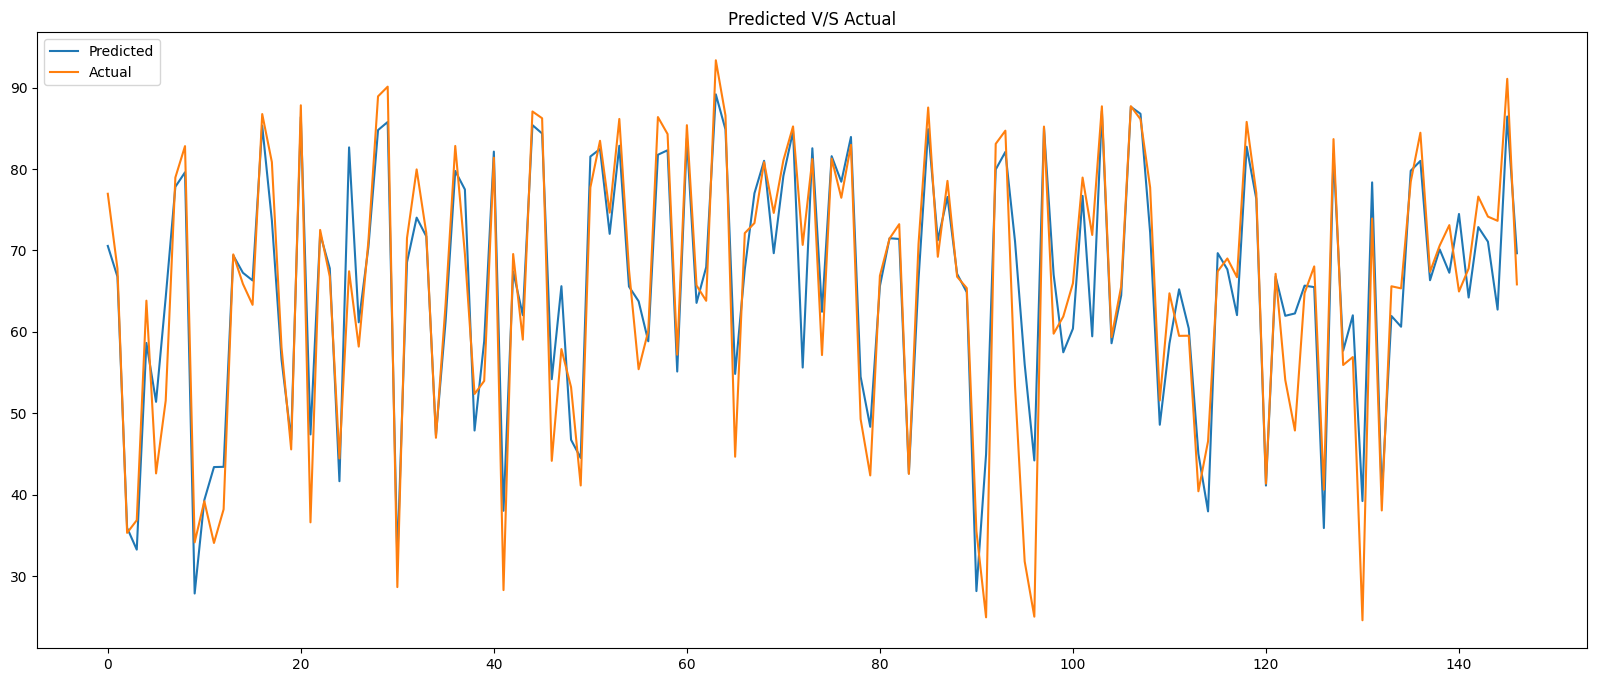

In [376]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

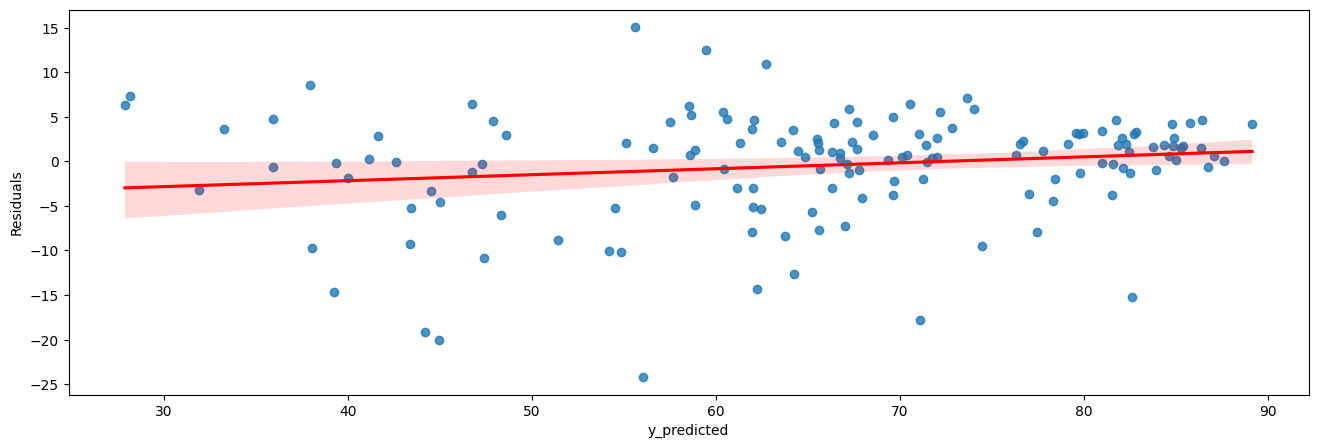

In [377]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

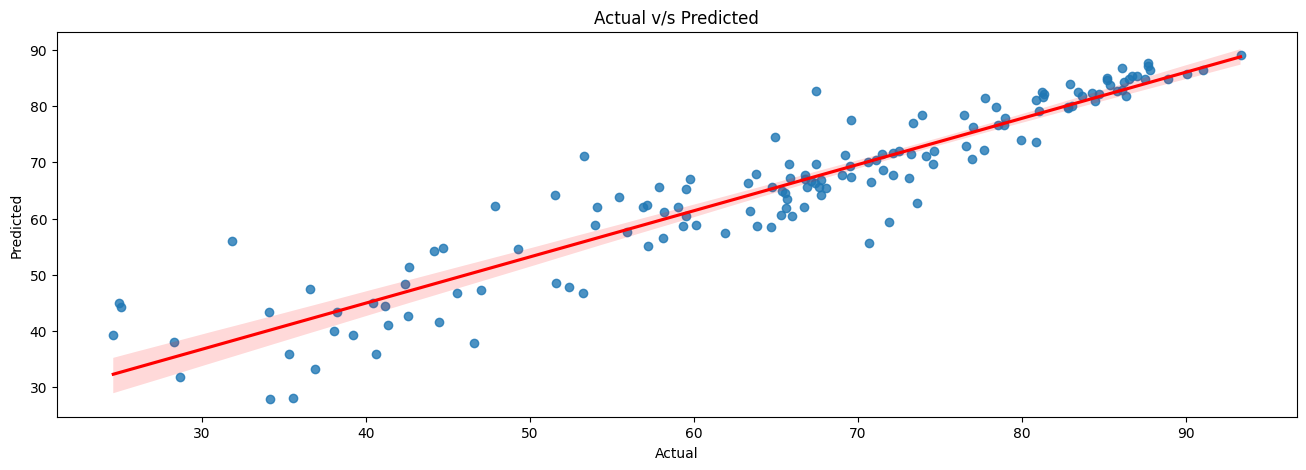

In [378]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_30876\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


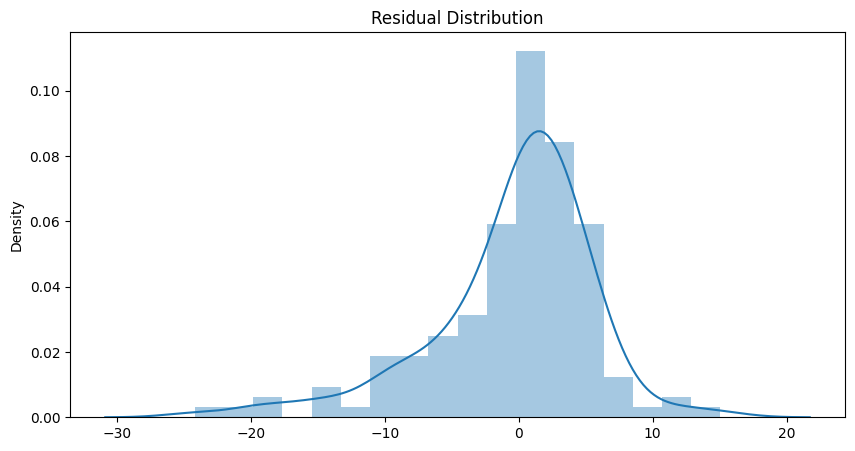

In [379]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

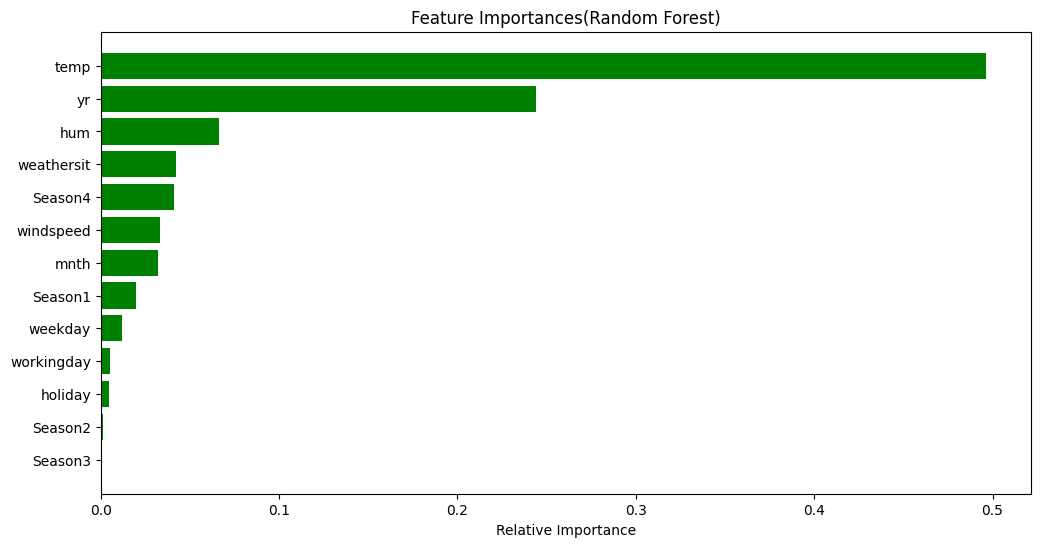

In [380]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [381]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [382]:
gradboo_reg.score(X_test,y_test)

0.8788639174975125

In [383]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred = gradboo_reg.predict(X_test)

In [384]:
#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.264967741871091.
The Mean Squred Error(MSE) is 34.40944128974675.
The Root Mean Squared Error(RMSE) is 5.865956127499314.
The R2 Score is 0.8788639174975125.
Adjusted R2 is 0.867023548531104.


In [385]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [392]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [393]:
#Gridsearch
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [394]:
# print best parameters and best score
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8685445500534128


In [395]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=150,
                          subsample=0.5)

In [390]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [396]:
grad_tuned.score(X_test,y_test)

0.894482307644341

In [397]:
#  y preidictions on train data.
y_pred_train = grad_tuned.predict(X_train)
# y predictions on test data
y_pred = grad_tuned.predict(X_test)

In [398]:
#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 3.795554693927082.
The Mean Squred Error(MSE) is 29.972942538133086.
The Root Mean Squared Error(RMSE) is 5.4747550208327205.
The R2 Score is 0.894482307644341.
Adjusted R2 is 0.8841685482411563.


In [399]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

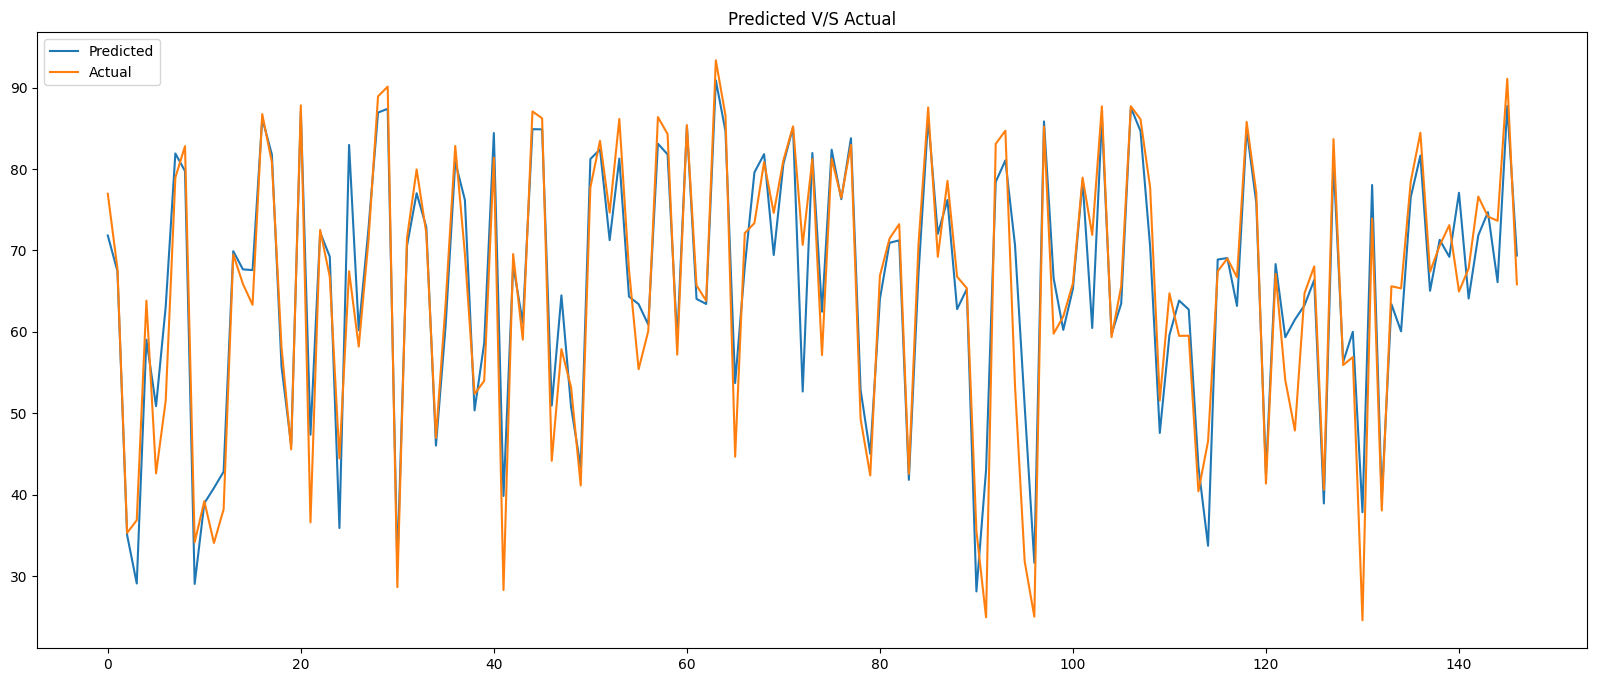

In [400]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

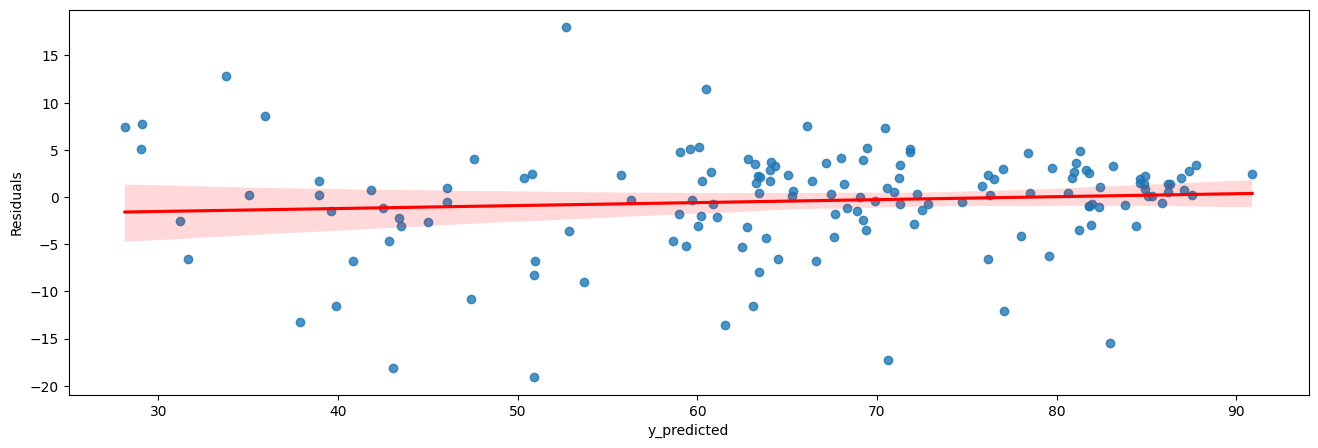

In [401]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

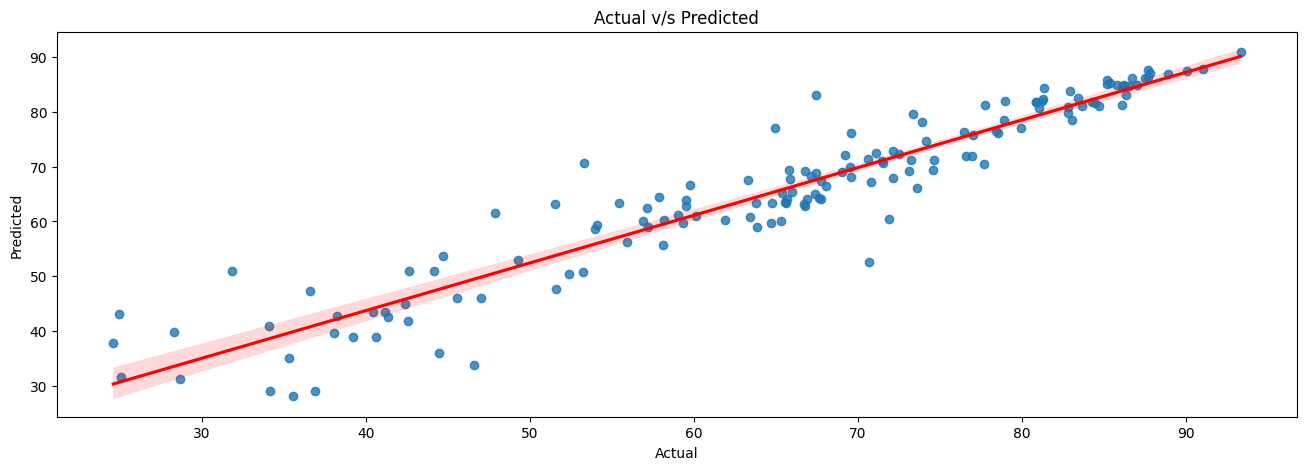

In [402]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_30876\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


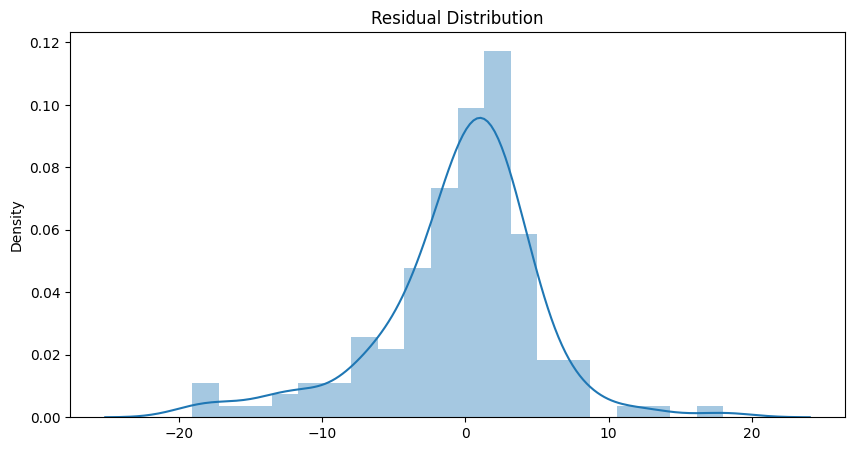

In [403]:
Residual_distPlot(y_pred,y_test)